# 5 CER Forest Structure Analysis Post Defense 
Digging deeper into the CHM, percent canopy cover, etc.

### Notebook contents 
* Copied from notebook 7 to start after the defense.
* Start addressing forest structure with BAF and DCE...
* Using the netcdf `v3_b` from notebook 1 in this folder (which includes extra rasters)

* Making a copy of `4_treatments_snow_b` and removing some plots to more easily get to % canopy cover. 

created by Cassie Lumbrazo\
date: March 2024\
python environment: **raster**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/341)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

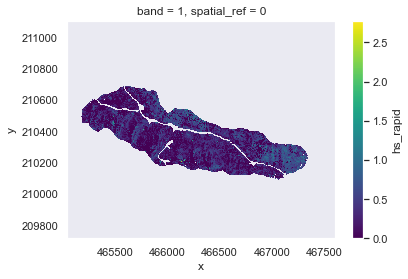

In [4]:
ds['hs_rapid'].plot()

## Constants and Calculations to Run before any other sections

In [5]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [6]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [7]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [9]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

## Pre-and Post-treatment CDFs

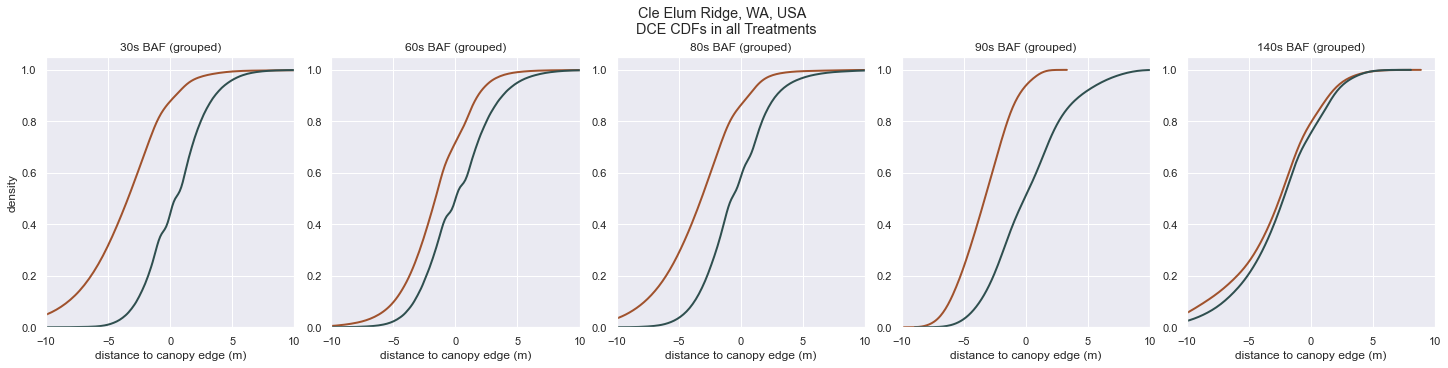

In [138]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_snowoff_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment', cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('30s BAF (grouped)')
axes[1].set_title('60s BAF (grouped)')
axes[2].set_title('80s BAF (grouped)')
axes[3].set_title('90s BAF (grouped)')
axes[4].set_title('140s BAF (grouped)')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[2].set_xlabel('distance to canopy edge (m)')
axes[3].set_xlabel('distance to canopy edge (m)')
axes[4].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')

plt.show()

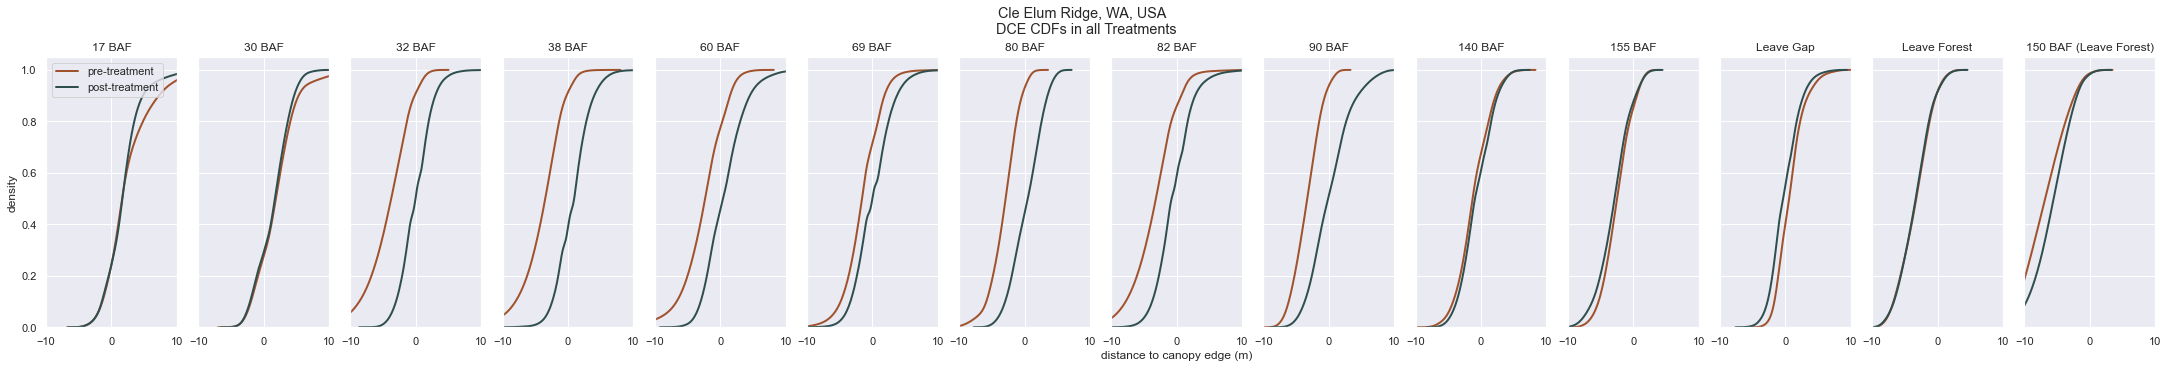

In [142]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 14, sharex=True, sharey=True, figsize=(30,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155

# adjust plot size 
# leave gap
# sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_17'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_30'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(),   ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_32'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(),   ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_38'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(),   ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_60'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(),   ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_69'].values.flatten(), ax=axes[5], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(),   ax=axes[5], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_80'].values.flatten(), ax=axes[6], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(),   ax=axes[6], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_82'].values.flatten(), ax=axes[7], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(),   ax=axes[7], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_90'].values.flatten(), ax=axes[8], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(),   ax=axes[8], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_140'].values.flatten(), ax=axes[9], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(),   ax=axes[9], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# leave gap
sns.kdeplot(ds['dce_snowoff_baf_new_155'].values.flatten(), ax=axes[10], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(),   ax=axes[10], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# but technically this is a leave forest 
# leave forest
sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[11], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[11], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_2'].values.flatten(), ax=axes[12], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(),   ax=axes[12], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_150'].values.flatten(), ax=axes[13], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(),   ax=axes[13], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('17 BAF')
axes[1].set_title('30 BAF')
axes[2].set_title('32 BAF')
axes[3].set_title('38 BAF')
axes[4].set_title('60 BAF')
axes[5].set_title('69 BAF')
axes[6].set_title('80 BAF')
axes[7].set_title('82 BAF')
axes[8].set_title('90 BAF')
axes[9].set_title('140 BAF')
axes[10].set_title('155 BAF')
axes[11].set_title('Leave Gap')
axes[12].set_title('Leave Forest')
axes[13].set_title('150 BAF (Leave Forest)')

axes[7].set_xlabel('distance to canopy edge (m)')
# axes[1].set_xlabel('distance to canopy edge (m)')
# axes[2].set_xlabel('distance to canopy edge (m)')
# axes[3].set_xlabel('distance to canopy edge (m)')
# axes[4].set_xlabel('distance to canopy edge (m)')


axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')
axes[0].legend(['pre-treatment', 'post-treatment'], loc='upper left')

plt.show()

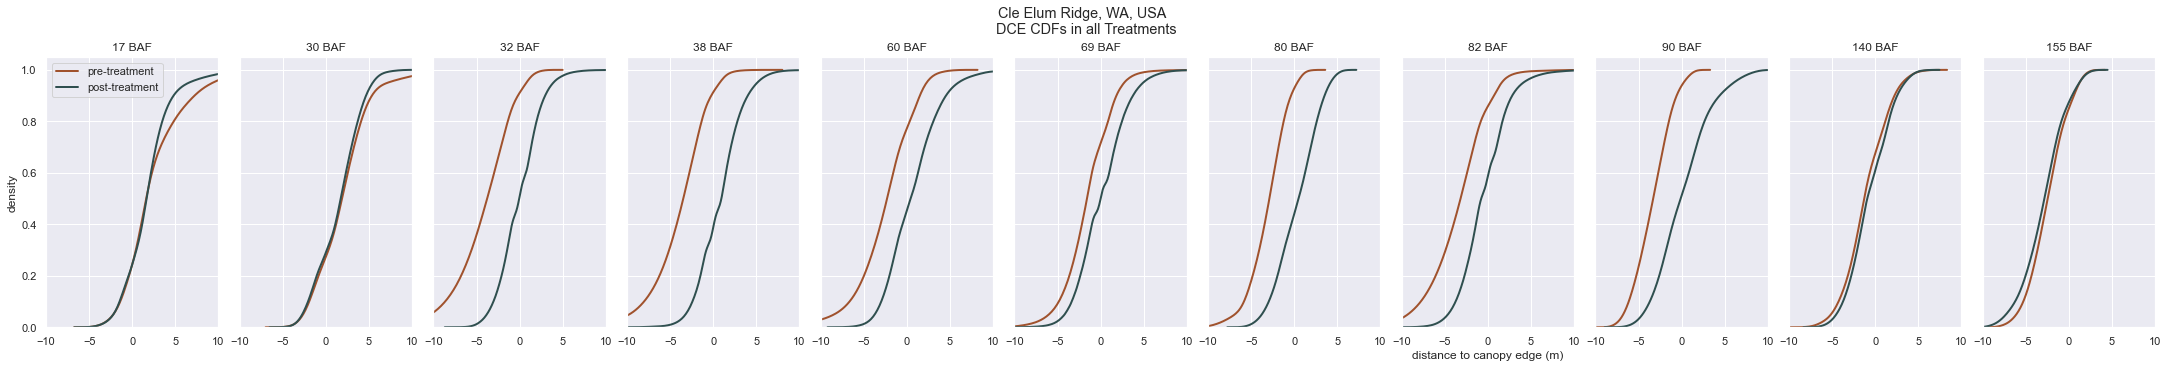

In [143]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 11, sharex=True, sharey=True, figsize=(30,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155

# adjust plot size 
# leave gap
# sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_17'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_30'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(),   ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_32'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(),   ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_38'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(),   ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_60'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(),   ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_69'].values.flatten(), ax=axes[5], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(),   ax=axes[5], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_80'].values.flatten(), ax=axes[6], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(),   ax=axes[6], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_82'].values.flatten(), ax=axes[7], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(),   ax=axes[7], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_90'].values.flatten(), ax=axes[8], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(),   ax=axes[8], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_140'].values.flatten(), ax=axes[9], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(),   ax=axes[9], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# leave gap
sns.kdeplot(ds['dce_snowoff_baf_new_155'].values.flatten(), ax=axes[10], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(),   ax=axes[10], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# but technically this is a leave forest 
# leave forest
# sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[11], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[11], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_2'].values.flatten(), ax=axes[12], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(),   ax=axes[12], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_150'].values.flatten(), ax=axes[13], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(),   ax=axes[13], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
axes[0].set_title('17 BAF')
axes[1].set_title('30 BAF')
axes[2].set_title('32 BAF')
axes[3].set_title('38 BAF')
axes[4].set_title('60 BAF')
axes[5].set_title('69 BAF')
axes[6].set_title('80 BAF')
axes[7].set_title('82 BAF')
axes[8].set_title('90 BAF')
axes[9].set_title('140 BAF')
axes[10].set_title('155 BAF')
# axes[11].set_title('Leave Gap')
# axes[12].set_title('Leave Forest')
# axes[13].set_title('150 BAF (Leave Forest)')

axes[7].set_xlabel('distance to canopy edge (m)')
# axes[1].set_xlabel('distance to canopy edge (m)')
# axes[2].set_xlabel('distance to canopy edge (m)')
# axes[3].set_xlabel('distance to canopy edge (m)')
# axes[4].set_xlabel('distance to canopy edge (m)')


axes[0].set_ylabel('density')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[4].set_ylabel('')

# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')
axes[0].legend(['pre-treatment', 'post-treatment'], loc='upper left')

plt.show()

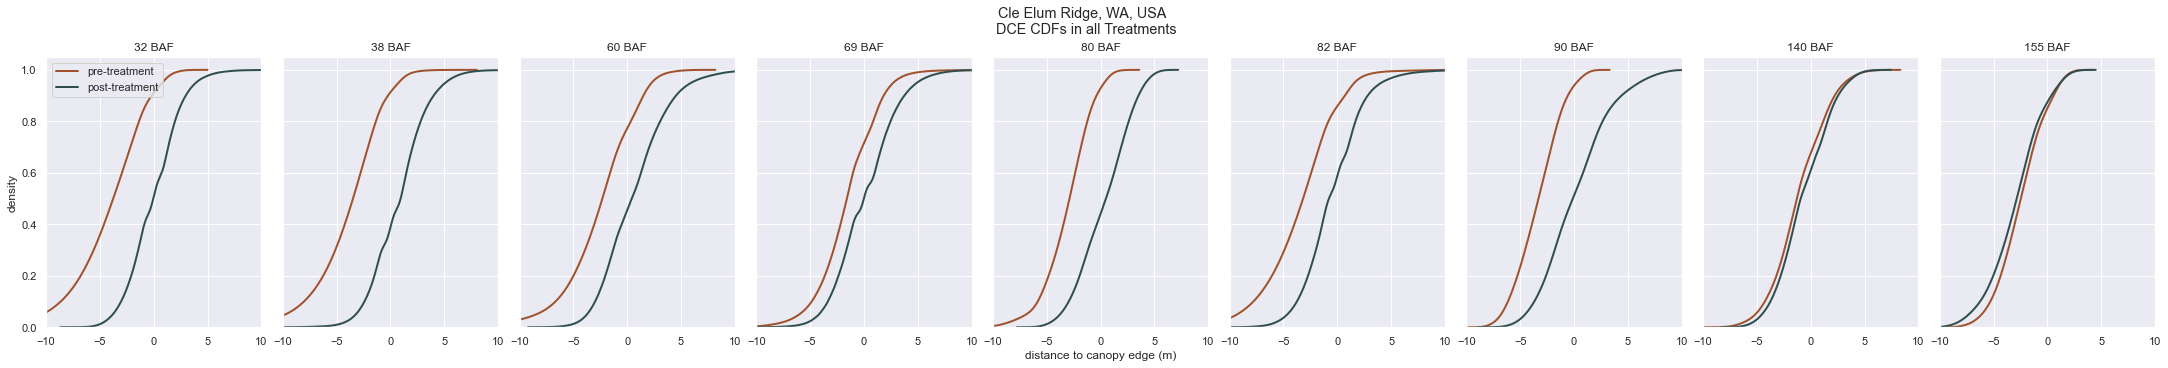

In [145]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 9, sharex=True, sharey=True, figsize=(30,5), constrained_layout = True)
# colorpre='darkslategrey'
# colorpos='mediumaquamarine'
colorpre='sienna'
colorpos='darkslategrey'
alpha=0.7

# plots 
# 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155

# adjust plot size 
# leave gap
# sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_17'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_30'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(),   ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_32'].values.flatten(), ax=axes[0], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(),   ax=axes[0], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_38'].values.flatten(), ax=axes[1], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(),   ax=axes[1], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_60'].values.flatten(), ax=axes[2], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(),   ax=axes[2], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_69'].values.flatten(), ax=axes[3], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(),   ax=axes[3], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_80'].values.flatten(), ax=axes[4], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(),   ax=axes[4], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_82'].values.flatten(), ax=axes[5], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(),   ax=axes[5], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_90'].values.flatten(), ax=axes[6], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(),   ax=axes[6], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

sns.kdeplot(ds['dce_snowoff_baf_new_140'].values.flatten(), ax=axes[7], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(),   ax=axes[7], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# leave gap
sns.kdeplot(ds['dce_snowoff_baf_new_155'].values.flatten(), ax=axes[8], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(),   ax=axes[8], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# but technically this is a leave forest 
# leave forest
# sns.kdeplot(ds['dce_snowoff_baf_new_1'].values.flatten(), ax=axes[11], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(),   ax=axes[11], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_2'].values.flatten(), ax=axes[12], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(),   ax=axes[12], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)

# sns.kdeplot(ds['dce_snowoff_baf_new_150'].values.flatten(), ax=axes[13], color=colorpre, label='pre-treatment',  cumulative=True, linewidth=2)
# sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(),   ax=axes[13], color=colorpos, label='post-treatment', cumulative=True, linewidth=2)


# labels
# axes[0].set_title('17 BAF')
# axes[1].set_title('30 BAF')
axes[0].set_title('32 BAF')
axes[1].set_title('38 BAF')
axes[2].set_title('60 BAF')
axes[3].set_title('69 BAF')
axes[4].set_title('80 BAF')
axes[5].set_title('82 BAF')
axes[6].set_title('90 BAF')
axes[7].set_title('140 BAF')
axes[8].set_title('155 BAF')
# axes[11].set_title('Leave Gap')
# axes[12].set_title('Leave Forest')
# axes[13].set_title('150 BAF (Leave Forest)')

axes[4].set_xlabel('distance to canopy edge (m)')
# axes[1].set_xlabel('distance to canopy edge (m)')
# axes[2].set_xlabel('distance to canopy edge (m)')
# axes[3].set_xlabel('distance to canopy edge (m)')
# axes[4].set_xlabel('distance to canopy edge (m)')


axes[0].set_ylabel('density')
axes[1].set_ylabel('')


# adjust x limits
axes[0].set_xlim(-10,10)

plt.suptitle('Cle Elum Ridge, WA, USA \n DCE CDFs in all Treatments')
axes[0].legend(['pre-treatment', 'post-treatment'], loc='upper left')

plt.show()

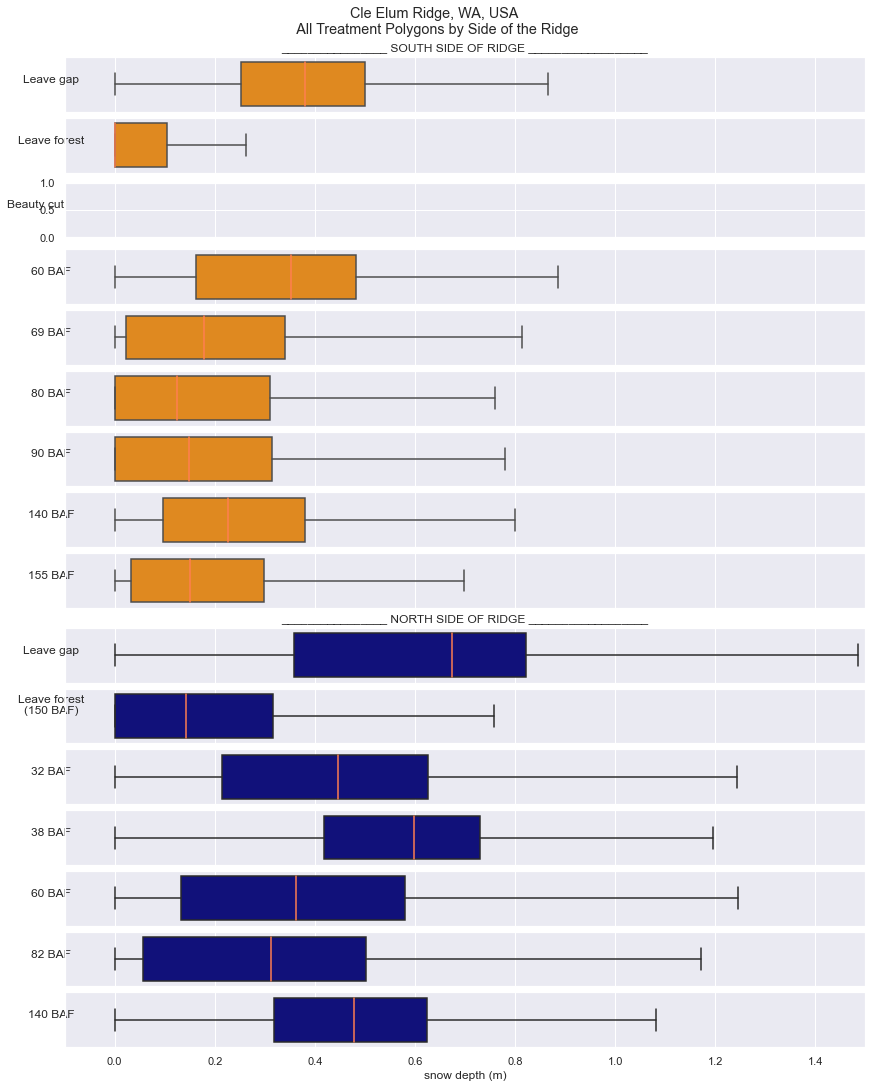

In [26]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(16, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_new_1_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_new_2_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_150_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0) # leave forest north side
# sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_new_3_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_32_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_38_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_new_60_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_new_69_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_new_80_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_82_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_new_90_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_new_140_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_new_155_s'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, fliersize=0)

# north side 
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_new_1_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_2_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_new_150_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_3_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)

sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_new_32_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[12], x = ds['hs_rapid_baf_new_38_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[13], x = ds['hs_rapid_baf_new_60_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[20], x = ds['hs_rapid_baf_new_69_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[21], x = ds['hs_rapid_baf_new_80_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[14], x = ds['hs_rapid_baf_new_82_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[23], x = ds['hs_rapid_baf_new_90_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
sns.boxplot(ax=axes[15], x = ds['hs_rapid_baf_new_140_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)
# sns.boxplot(ax=axes[25], x = ds['hs_rapid_baf_new_155_n'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, fliersize=0)


# # labels
axes[0].set_title('________________ SOUTH SIDE OF RIDGE __________________')
axes[9].set_title('________________ NORTH SIDE OF RIDGE __________________')
axes[15].set_xlabel('snow depth (m)')

axes[0].set_ylabel('Leave gap', rotation=360)
axes[1].set_ylabel('Leave forest', rotation=360)
axes[2].set_ylabel('Beauty cut', rotation=360)
# axes[3].set_ylabel('32 BAF', rotation=360)
# axes[5].set_ylabel('38 BAF', rotation=360)
axes[3].set_ylabel('60 BAF', rotation=360)
axes[4].set_ylabel('69 BAF', rotation=360)
axes[5].set_ylabel('80 BAF', rotation=360)
# axes[6].set_ylabel('82 BAF', rotation=360)
axes[6].set_ylabel('90 BAF', rotation=360)
axes[7].set_ylabel('140 BAF', rotation=360)
axes[8].set_ylabel('155 BAF', rotation=360)

axes[9].set_ylabel('Leave gap', rotation=360)
axes[10].set_ylabel('Leave forest\n(150 BAF)', rotation=360)
# axes[16].set_ylabel('Beauty cut', rotation=360)
axes[11].set_ylabel('32 BAF', rotation=360)
axes[12].set_ylabel('38 BAF', rotation=360)
axes[13].set_ylabel('60 BAF', rotation=360)
# axes[20].set_ylabel('69 BAF', rotation=360)
# axes[21].set_ylabel('80 BAF', rotation=360)
axes[14].set_ylabel('82 BAF', rotation=360)
# axes[23].set_ylabel('90 BAF', rotation=360)
axes[15].set_ylabel('140 BAF', rotation=360)
# axes[25].set_ylabel('155 BAF', rotation=360)


# adjust x limits
axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n All Treatment Polygons by Side of the Ridge')

plt.show()

## CDF Distributions

#### Distance to canopy edge CDFs

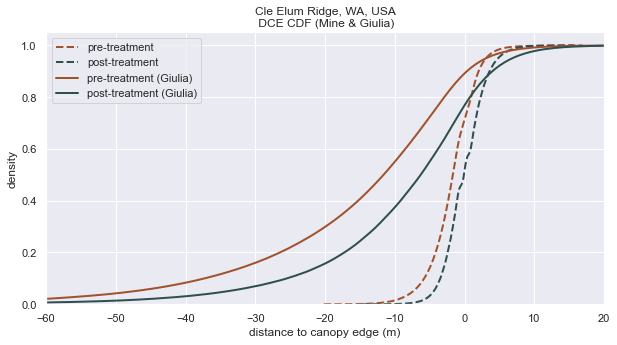

In [34]:
# adjust plot size 
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(ds['dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment', cumulative=True, linewidth=2, linestyle='dashed')
sns.kdeplot(ds['dce_rapid'].values.flatten(), color=colorpos, label='post-treatment', cumulative=True, linewidth=2, linestyle='dashed')

sns.kdeplot(ds['giulia_dce_snowoff'].values.flatten(), color=colorpre, label='pre-treatment (Giulia)', cumulative=True, linewidth=2)
sns.kdeplot(ds['giulia_dce_rapid'].values.flatten(), color=colorpos, label='post-treatment (Giulia)', cumulative=True, linewidth=2)

plt.title('Cle Elum Ridge, WA, USA\n DCE CDF (Mine & Giulia)')
plt.ylabel('density')
plt.xlabel('distance to canopy edge (m)')
plt.xlim(-60,20)
plt.legend()

Now, CDF inside each treatment 

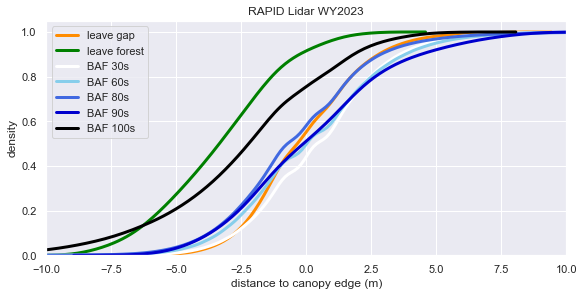

In [38]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

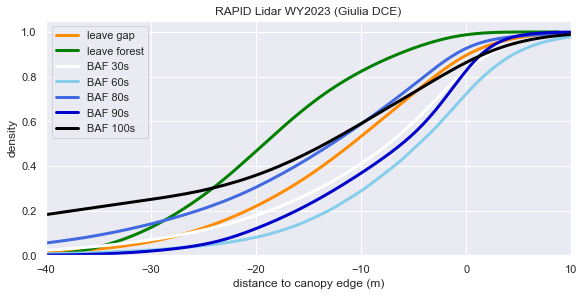

In [39]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 (Giulia DCE)')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-40,10)

plt.legend()
plt.show()

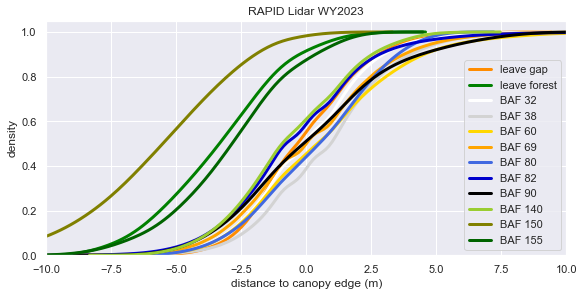

In [40]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='white', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='lightgrey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['dce_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

#### Snow depth CDFs 

In [41]:
ds['hs_ncalm_baf_new_17'] = ds['hs_ncalm'].where(ds['baf_new'] == 17)
ds['hs_ncalm_baf_new_30'] = ds['hs_ncalm'].where(ds['baf_new'] == 30)

ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)
ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)

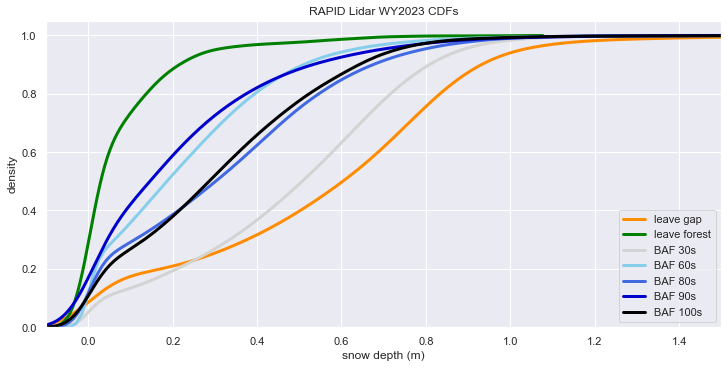

In [96]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_30s'].values.flatten(), color='lightgrey', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

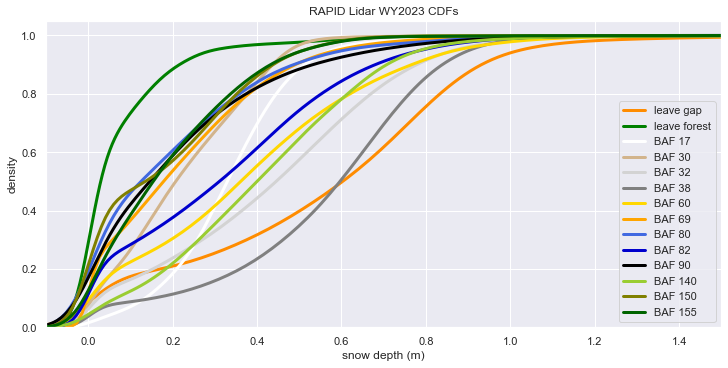

In [91]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color='white', label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color='tan', label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='lightgrey', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

In [92]:
ds['hs_rapid_baf_new_17_n'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == -1)
ds['hs_rapid_baf_new_30_n'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == -1)

ds['hs_rapid_baf_new_17_s'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
ds['hs_rapid_baf_new_30_s'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)

Now, do this but break this up by side of the ridge 
* the variables for this are created in `1_update_netcdf.ipynb`

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


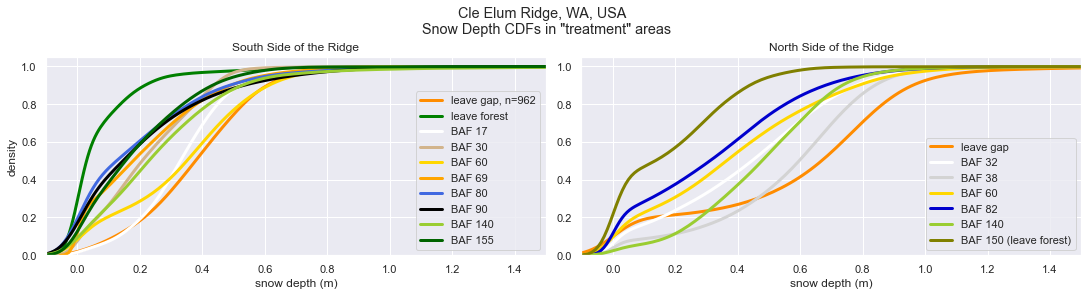

In [95]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

Now, check this for the sensitivity for each side of the ridge 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


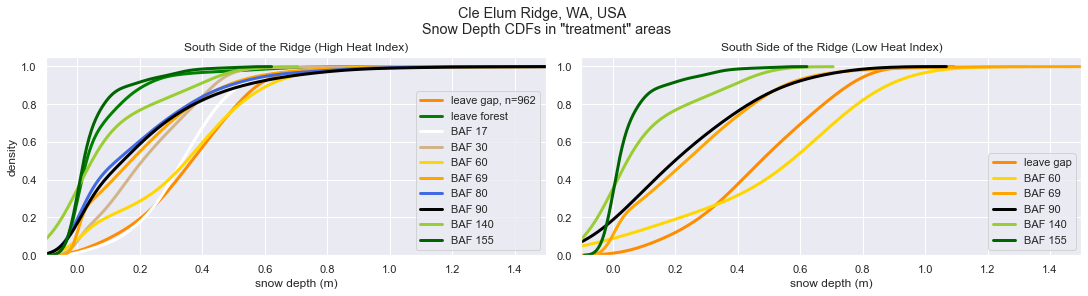

In [97]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


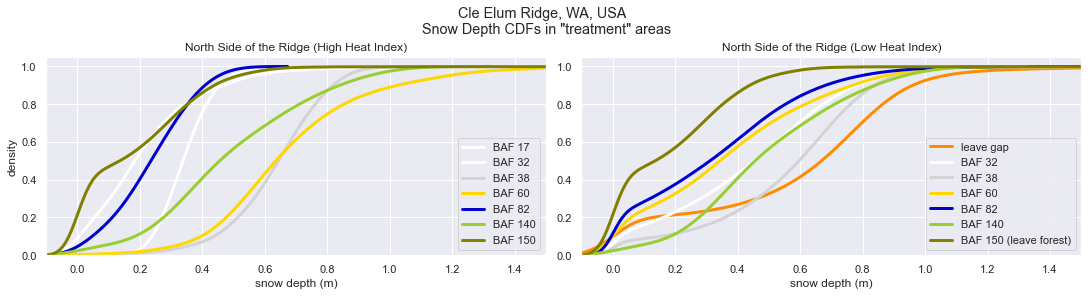

In [98]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

I want to, randomly now, look at the low heat index areas of the south side of the ridge...

## Plot Requested- 
Looking at is DCE represents the BAF well... 

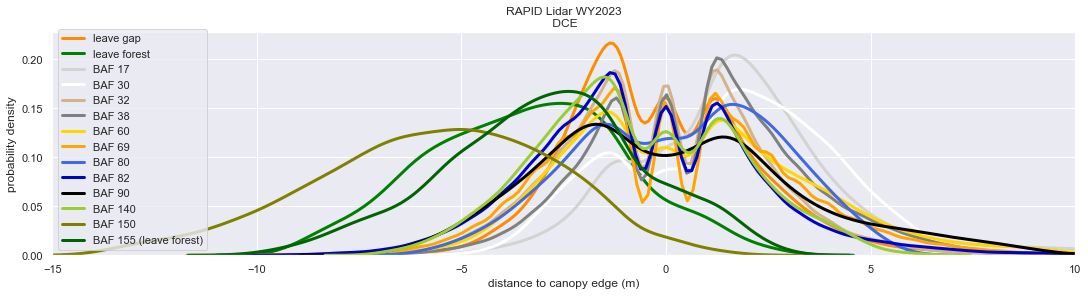

In [46]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), color='lightgrey', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), color='white', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023\n DCE')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-15,10)

plt.legend()
plt.show()

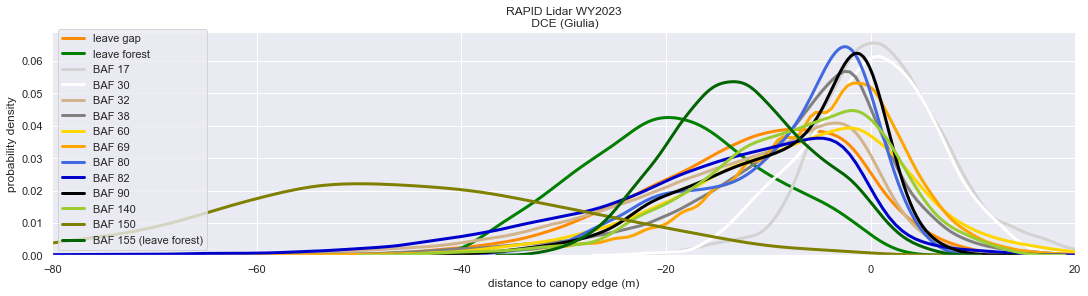

In [47]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), color='lightgrey', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), color='white', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023\n DCE (Giulia)')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('probability density')
plt.xlim(-80,20)

plt.legend()
plt.show()

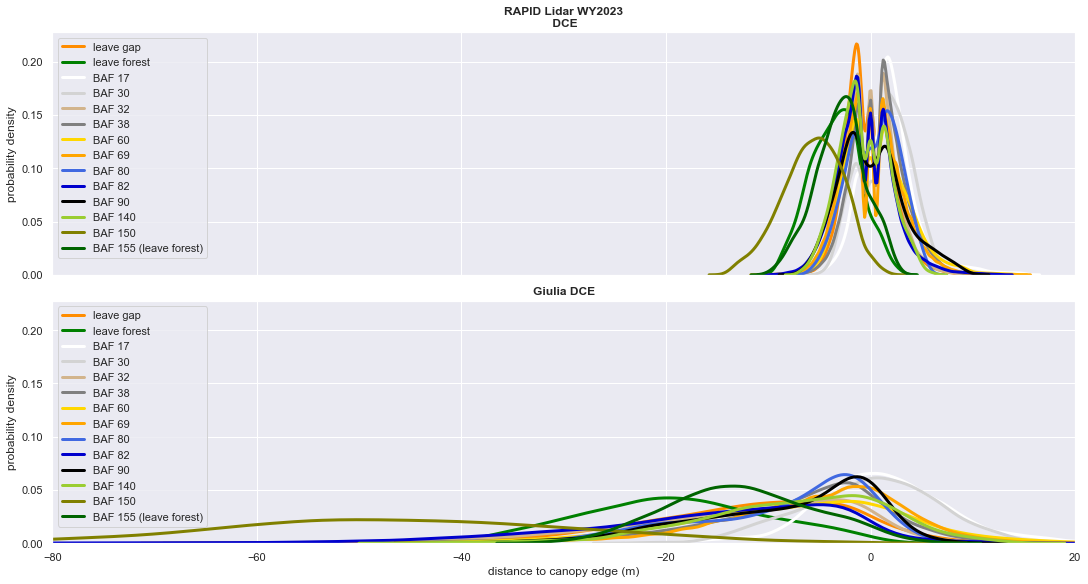

In [72]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), ax=axes[1], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), ax=axes[1], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), ax=axes[1], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), ax=axes[1], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
axes[0].set_title('RAPID Lidar WY2023\n DCE', weight='bold')
axes[1].set_title('Giulia DCE', weight='bold')
axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('probability density')
axes[1].set_ylabel('probability density')
# plt.xlim(-15,10)

axes[0].set_xlim(-15,10)
axes[1].set_xlim(-80,20)

# set the legend
axes[0].legend()
axes[1].legend()
plt.show()

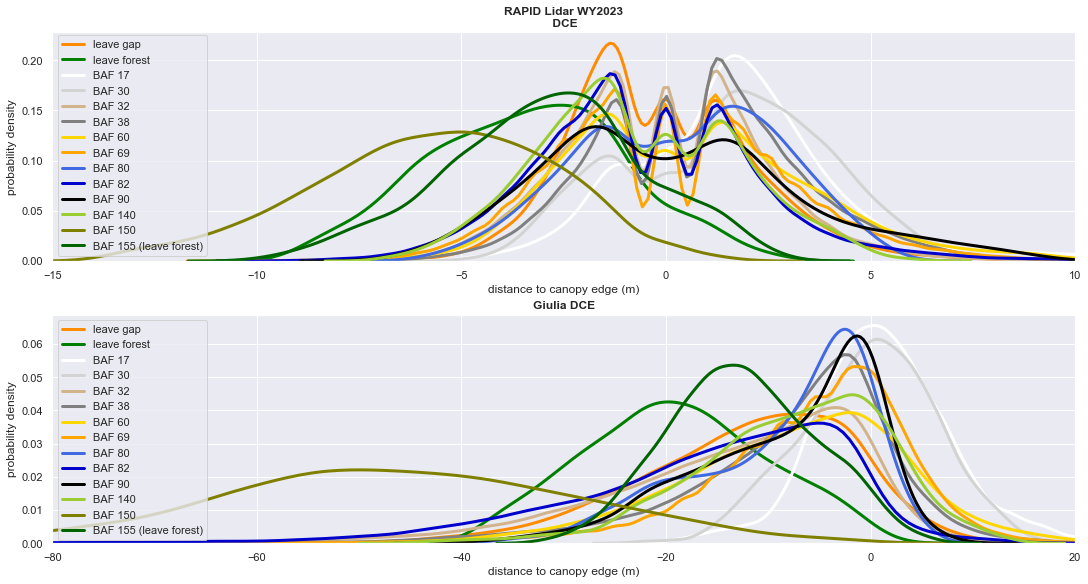

In [48]:
# we want to create a plot with DCE on the x axis, and count on the y axis, for each BAF treatment
# plot of a histogram of all those variables
fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(15,8), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), ax=axes[0], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_17'].values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_30'].values.flatten(), ax=axes[0], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), ax=axes[0], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), ax=axes[0], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# plots
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_17'].values.flatten(), ax=axes[1], color='white', label='BAF 17', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_30'].values.flatten(), ax=axes[1], color='lightgrey', label='BAF 30', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_32'].values.flatten(), ax=axes[1], color='tan', label='BAF 32', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_38'].values.flatten(), ax=axes[1], color='grey', label='BAF 38', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_60'].values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_69'].values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_80'].values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_82'].values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_90'].values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_140'].values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_150'].values.flatten(), ax=axes[1], color='olive', label='BAF 150', cumulative=False, linewidth=3)
sns.kdeplot(ds['giulia_dce_rapid_baf_new_155'].values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155 (leave forest)', cumulative=False, linewidth=3)

# labels
axes[0].set_title('RAPID Lidar WY2023\n DCE', weight='bold')
axes[1].set_title('Giulia DCE', weight='bold')
axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')
axes[0].set_ylabel('probability density')
axes[1].set_ylabel('probability density')
# plt.xlim(-15,10)

axes[0].set_xlim(-15,10)
axes[1].set_xlim(-80,20)

# set the legend
axes[0].legend()
axes[1].legend()
plt.show()

### Snow depth CDFs by DCE groups for north and south sides of the ridge

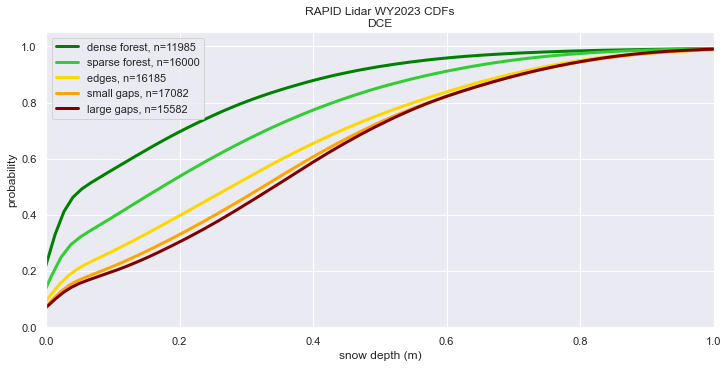

In [73]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

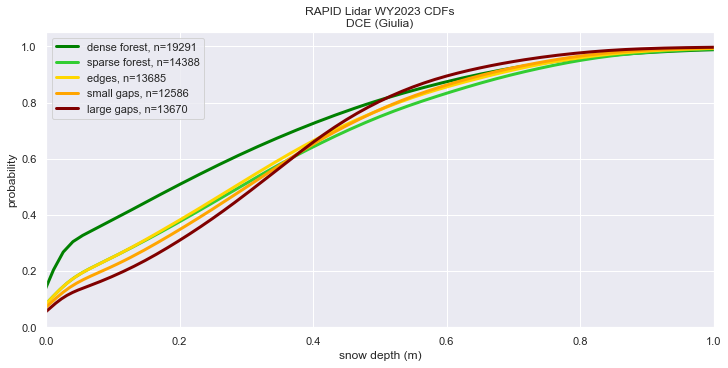

In [51]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=True, figsize=(10,5), constrained_layout = True)

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100'].values.flatten(), color='green', label=f'dense forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_100"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200'].values.flatten(), color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300'].values.flatten(), color='gold', label=f'edges, n={np.unique(ds["hs_giulia_dce_rapid_reclass_300"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400'].values.flatten(), color='orange', label=f'small gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_400"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500'].values.flatten(), color='maroon', label=f'large gaps, n={np.unique(ds["hs_giulia_dce_rapid_reclass_500"]).size}', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs\nDCE (Giulia)')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(0,1)
# plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

The same plot, but by side of the ridge

Make this plot, but put south and north into two different plots

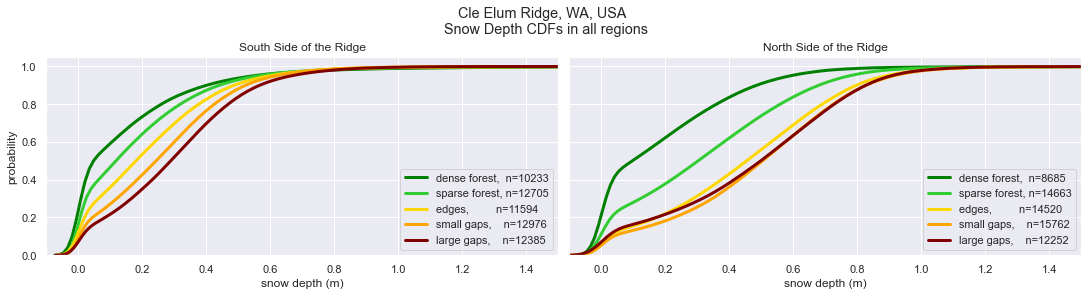

In [52]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
axes[0].legend()
axes[1].legend()
plt.show()

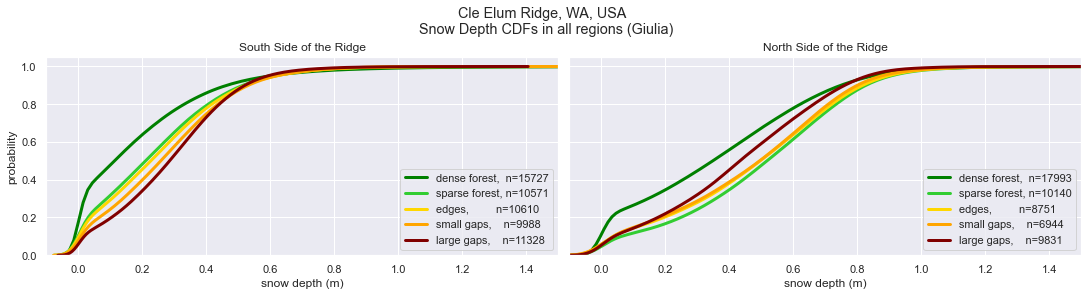

In [53]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"]).size}', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green',     label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold',      label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange',    label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"]).size}', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon',    label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"]).size}', cumulative=True, linewidth=3)

# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Now, let's make this for only the south side with high and low heat index (north too). so break up each my heat index as a secondary factor. 

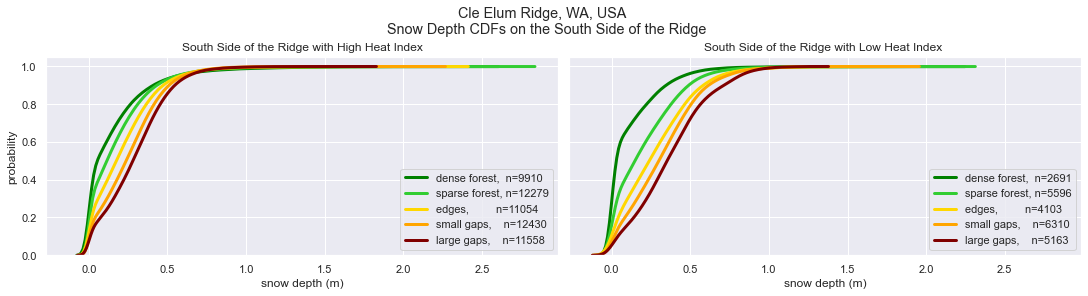

In [78]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

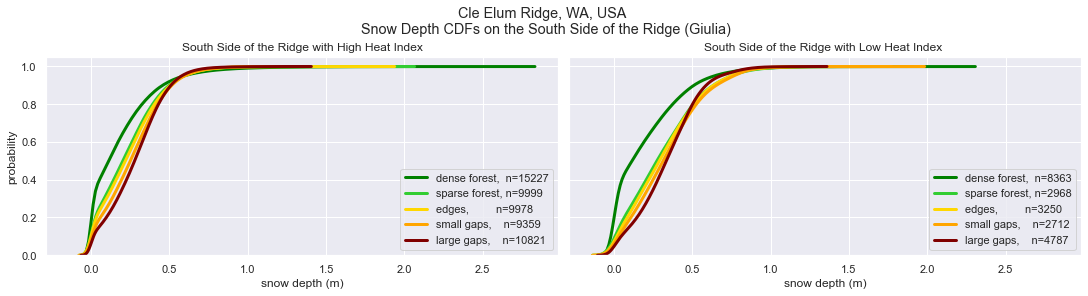

In [80]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the South Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge with High Heat Index')
axes[1].set_title('South Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

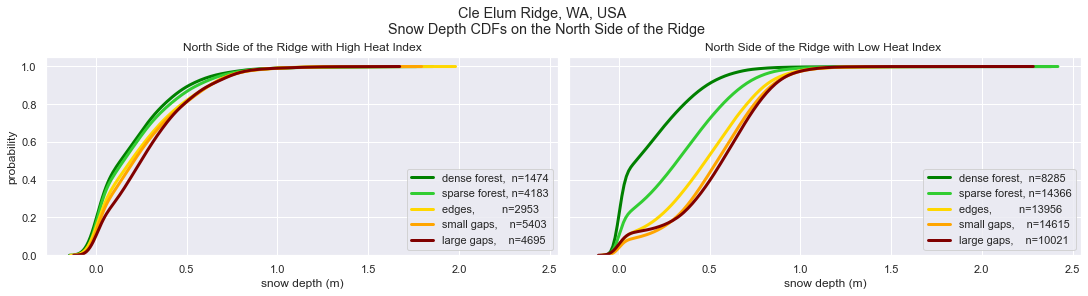

In [79]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

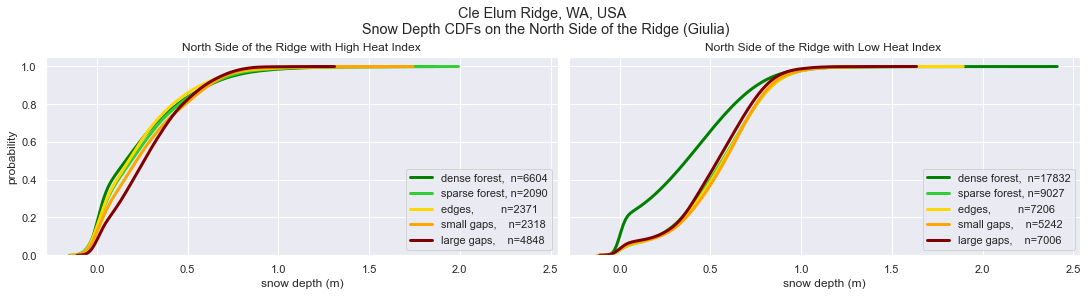

In [81]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 =  1 # high heat index
number2 = -1 # low heat index 
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs on the North Side of the Ridge (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["dah_binary"] == number2)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["dah_binary"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["dah_binary"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["dah_binary"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["dah_binary"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge with High Heat Index')
axes[1].set_title('North Side of the Ridge with Low Heat Index ')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

## Now, going into each treatment and plotting the same thing

ds['hs_rapid_baf_new_1'] = ds['hs_rapid'].where(ds['baf_new'] == 1)\
ds['hs_rapid_baf_new_2'] = ds['hs_rapid'].where(ds['baf_new'] == 2)\
ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)\
ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)\
ds['hs_rapid_baf_new_32'] = ds['hs_rapid'].where(ds['baf_new'] == 32)\
ds['hs_rapid_baf_new_38'] = ds['hs_rapid'].where(ds['baf_new'] == 38)\
ds['hs_rapid_baf_new_60'] = ds['hs_rapid'].where(ds['baf_new'] == 60)\
ds['hs_rapid_baf_new_69'] = ds['hs_rapid'].where(ds['baf_new'] == 69)\
ds['hs_rapid_baf_new_80'] = ds['hs_rapid'].where(ds['baf_new'] == 80)\
ds['hs_rapid_baf_new_82'] = ds['hs_rapid'].where(ds['baf_new'] == 82)\
ds['hs_rapid_baf_new_90'] = ds['hs_rapid'].where(ds['baf_new'] == 90)\
ds['hs_rapid_baf_new_92'] = ds['hs_rapid'].where(ds['baf_new'] == 92)\
ds['hs_rapid_baf_new_140'] = ds['hs_rapid'].where(ds['baf_new'] == 140)\
ds['hs_rapid_baf_new_150'] = ds['hs_rapid'].where(ds['baf_new'] == 150)\
ds['hs_rapid_baf_new_155'] = ds['hs_rapid'].where(ds['baf_new'] == 155)\

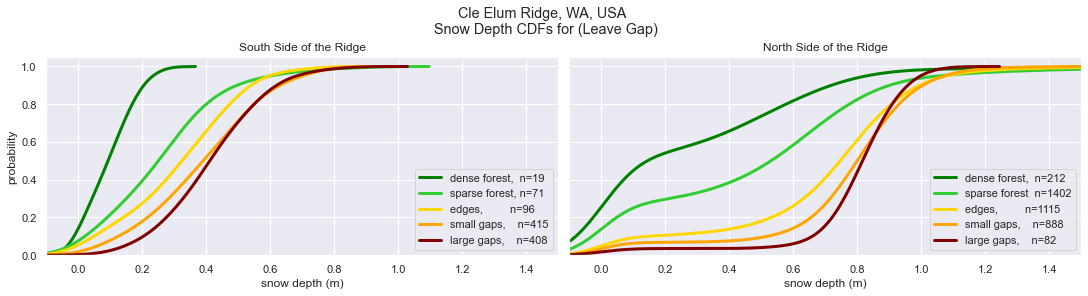

In [54]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

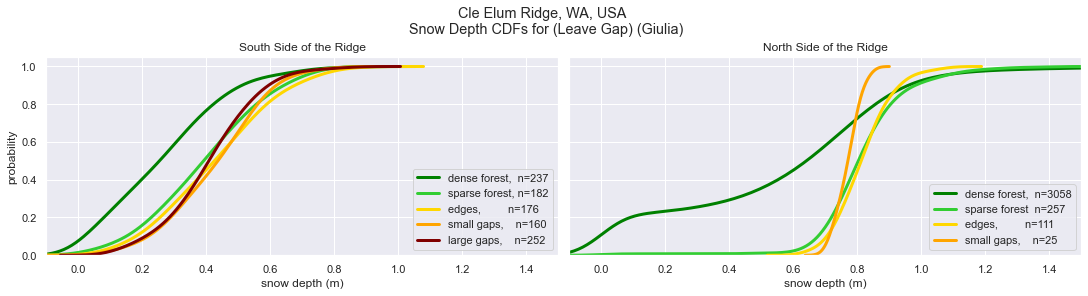

In [55]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 1)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 1)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 1).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 1)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Gap) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

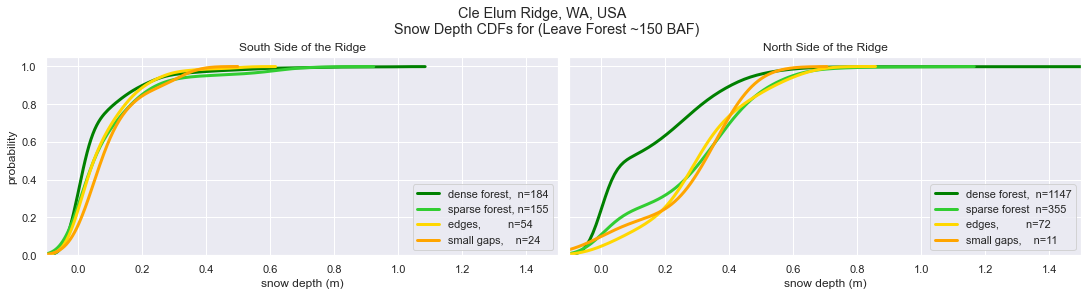

In [56]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


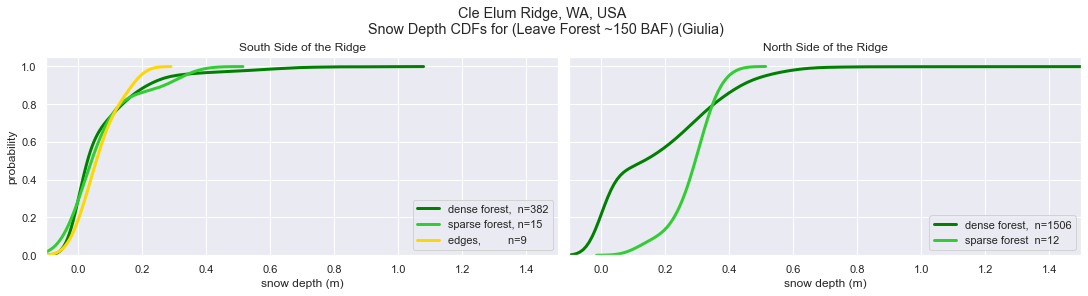

In [57]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == 2)).size}',  color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == 2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == 2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == 2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == 2).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == 2)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == 150)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == 150)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == 150)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == 150)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == 150).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == 150)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (Leave Forest ~150 BAF) (Giulia)')
axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

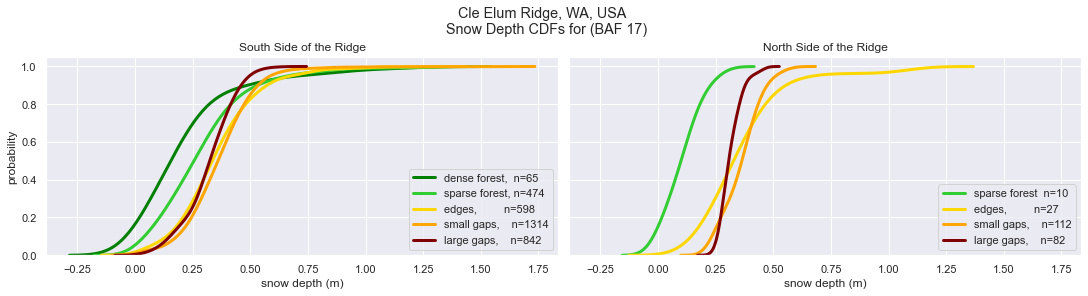

In [58]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

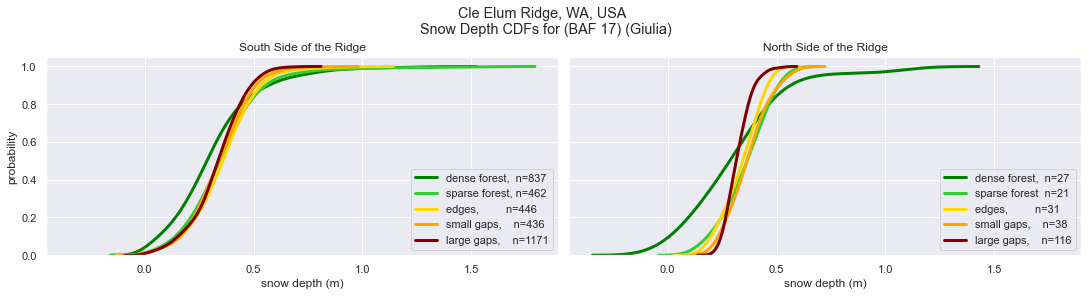

In [59]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 17
number2 = 17
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 17) (Giulia)')


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

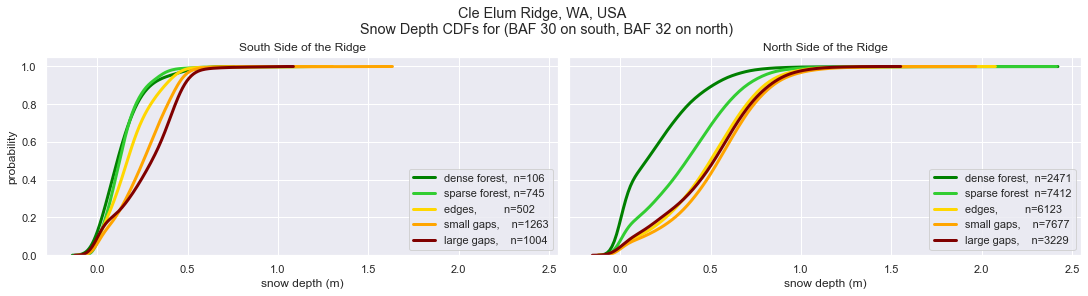

In [60]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

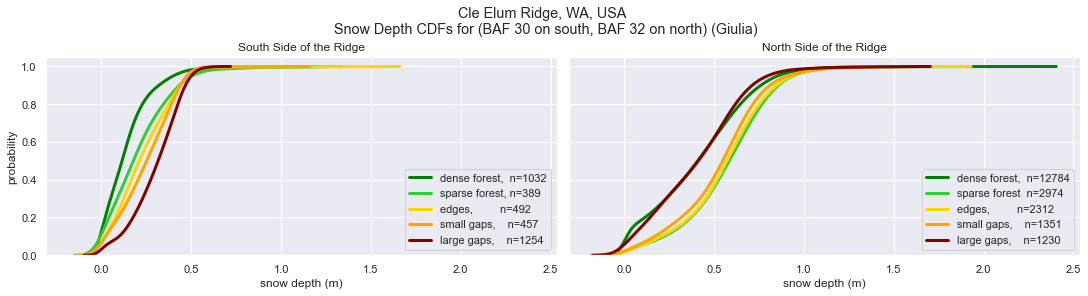

In [61]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 30
number2 = 32
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 30 on south, BAF 32 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


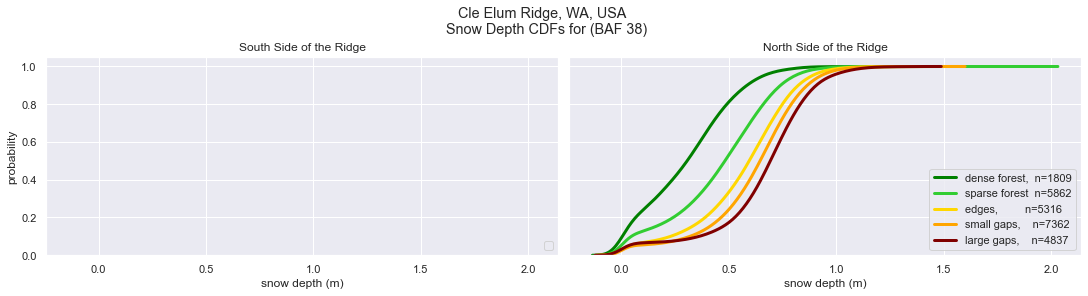

In [85]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Out of curiousity, check the heat index sensitivty on this BAF 38 on the north side, and on the large BAF69 on the south side. 

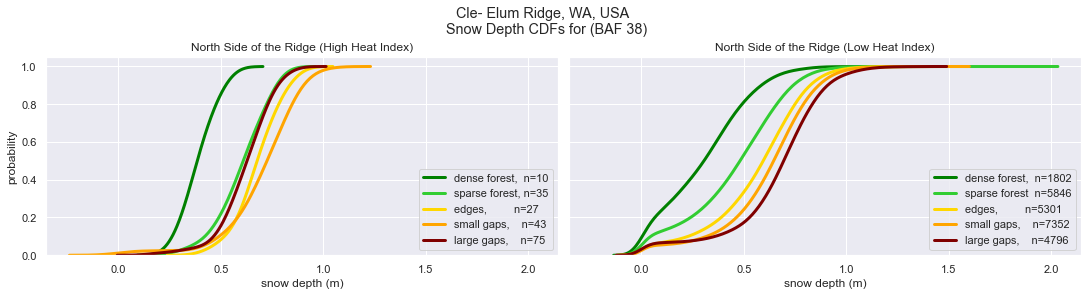

In [89]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


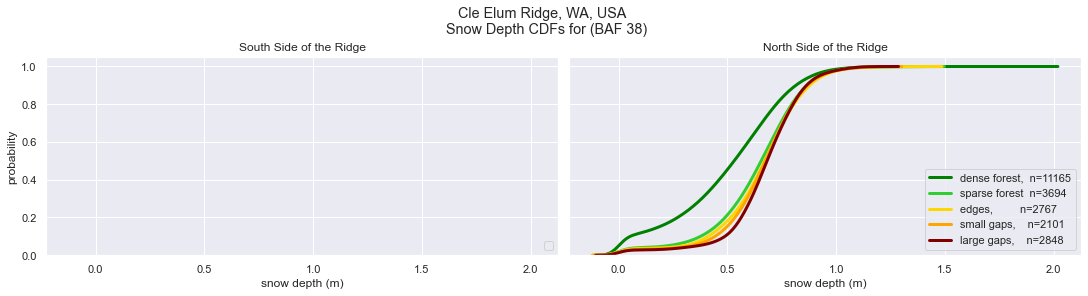

In [87]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 38
number2 = 38
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


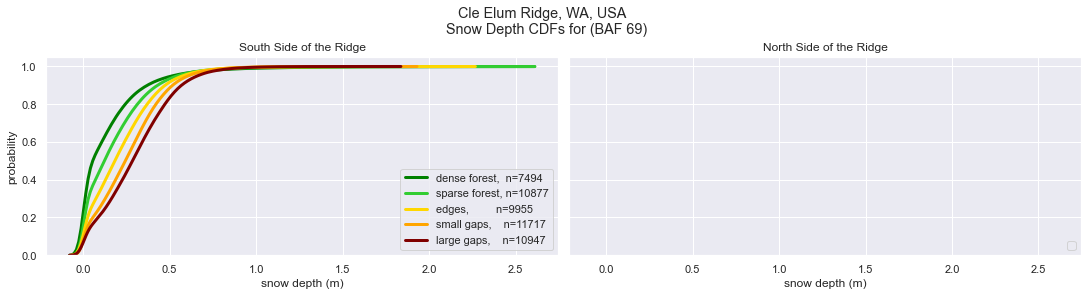

In [62]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

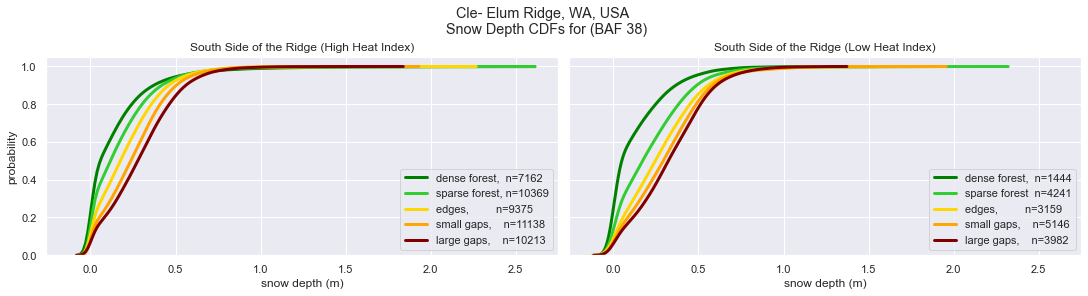

In [90]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt. suptitle('Cle- Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 38)')


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1)).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number1) & (ds["dah_binary"] ==  1))).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1)).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where((ds["baf_new"] == number2) & (ds["dah_binary"] == -1))).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


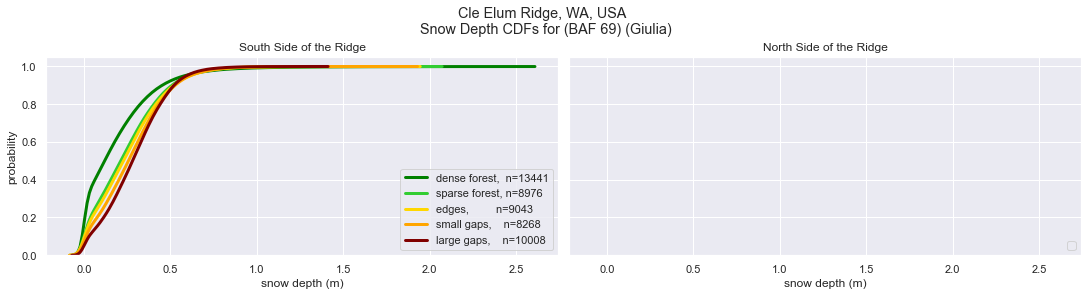

In [63]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 69
number2 = 69
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 69) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

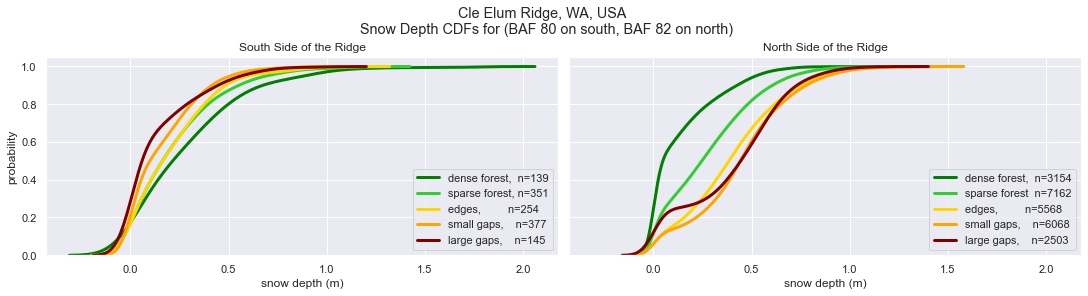

In [83]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, BAF 82 on north)')   

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

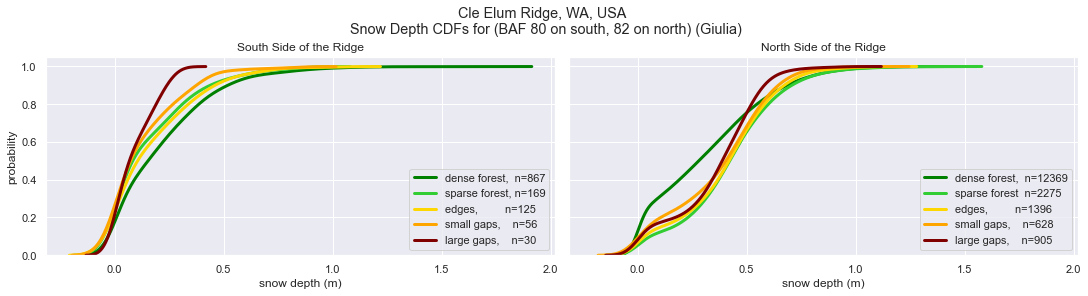

In [84]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 80
number2 = 82
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 80 on south, 82 on north) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


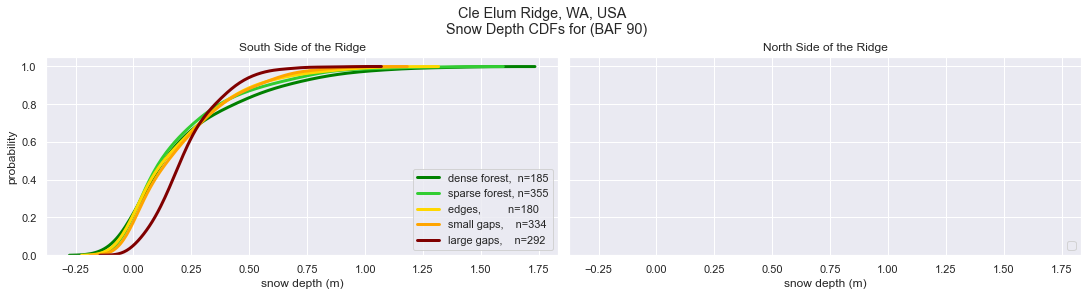

In [66]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


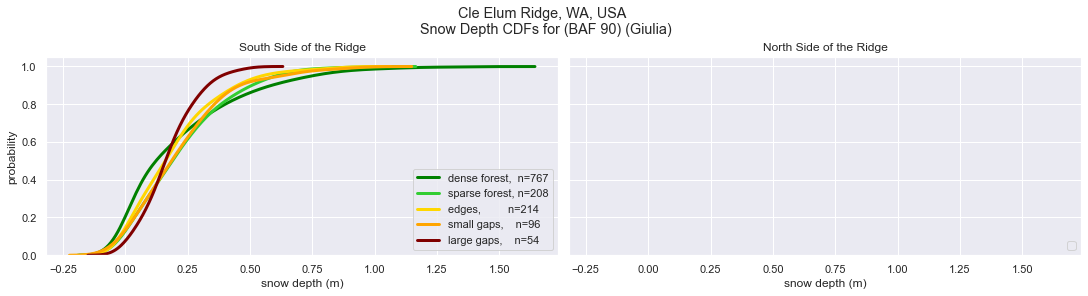

In [67]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 90
number2 = 90
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 90) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

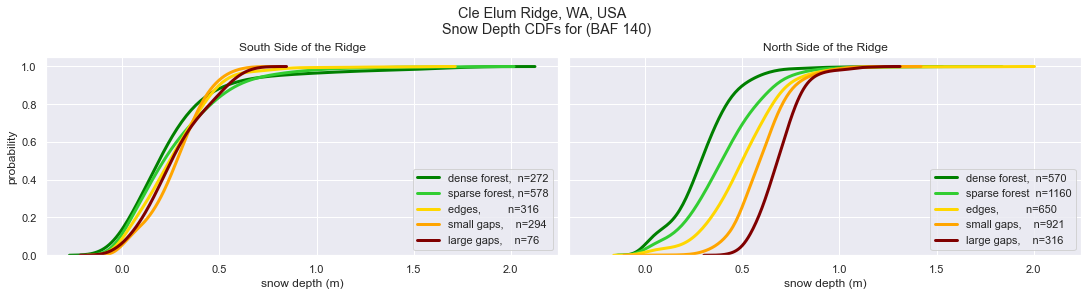

In [68]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

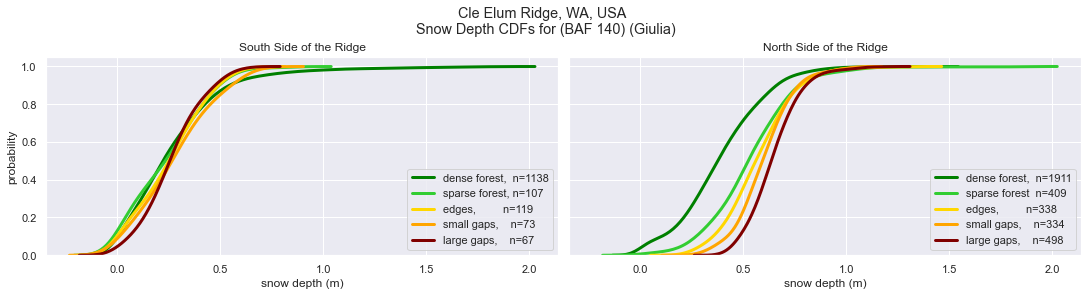

In [69]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 140
number2 = 140
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 140) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


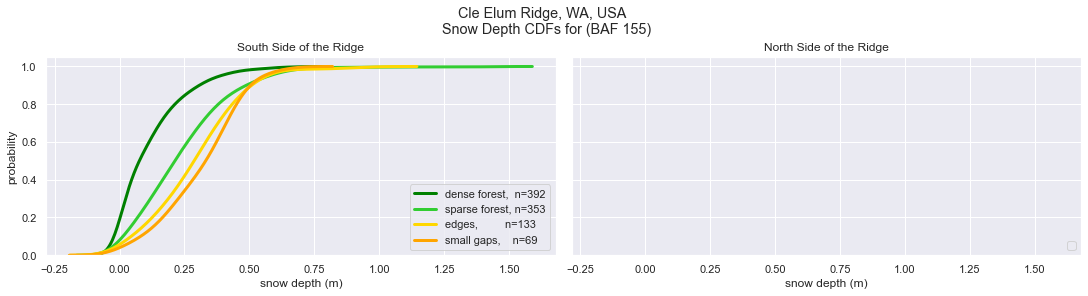

In [70]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155)')

# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


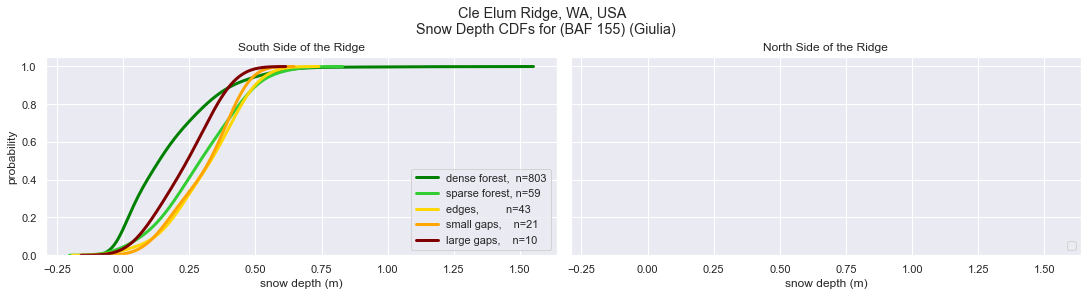

In [71]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 155
number2 = 155
plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs for (BAF 155) (Giulia)')

# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_s"].where(ds["baf_new"] == number1)).size}',  color='green',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'sparse forest, n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_s"].where(ds["baf_new"] == number1)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_s"].where(ds["baf_new"] == number1)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_s"].where(ds["baf_new"] == number1)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s'].where(ds["baf_new"] == number1).values.flatten(), ax=axes[0], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_s"].where(ds["baf_new"] == number1)).size}', color='maroon',   cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'dense forest,  n={np.unique(ds["hs_giulia_dce_rapid_reclass_100_n"].where(ds["baf_new"] == number2)).size}', color='green',    cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'sparse forest  n={np.unique(ds["hs_giulia_dce_rapid_reclass_200_n"].where(ds["baf_new"] == number2)).size}', color='limegreen',cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'edges,         n={np.unique(ds["hs_giulia_dce_rapid_reclass_300_n"].where(ds["baf_new"] == number2)).size}', color='gold',     cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'small gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_400_n"].where(ds["baf_new"] == number2)).size}', color='orange',   cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n'].where(ds["baf_new"] == number2).values.flatten(), ax=axes[1], label=f'large gaps,    n={np.unique(ds["hs_giulia_dce_rapid_reclass_500_n"].where(ds["baf_new"] == number2)).size}', color='maroon',   cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].legend(loc='lower right')
axes[1].legend(loc='lower right')
plt.show()

Do the same by DAH just to compare with the side of the ridge plot...

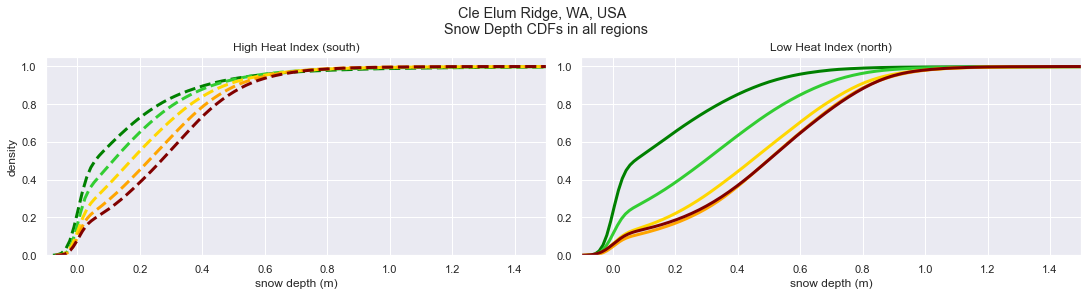

In [49]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions')
# plt.legend()
plt.show()

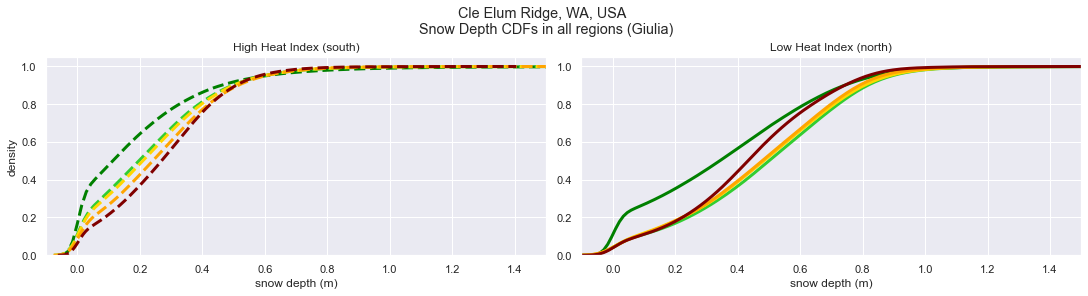

In [55]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_s_dah'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_s_dah'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_s_dah'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_s_dah'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_s_dah'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_100_n_dah'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_200_n_dah'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_300_n_dah'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_400_n_dah'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_giulia_dce_rapid_reclass_500_n_dah'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('High Heat Index (south)')
axes[1].set_title('Low Heat Index (north)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia)')
# plt.legend()
plt.show()

In [124]:
# drop all data where gaps are bigger than 30 m 
ds2 = ds.where(ds['giulia_dce_rapid'] < 30)
ds2 = ds2.where(ds2['giulia_dce_rapid'] > -40)

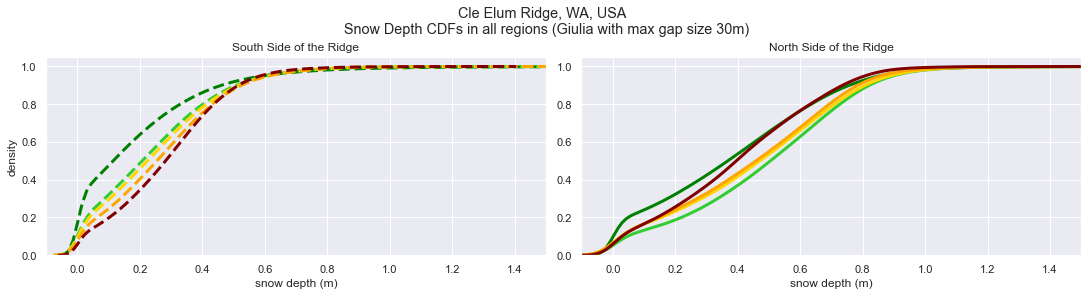

In [125]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7


# plots
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_s'].values.flatten(), ax=axes[0], color='green', label='dense forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_s'].values.flatten(), ax=axes[0], color='limegreen', label='sparse forest', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_s'].values.flatten(), ax=axes[0], color='gold', label='edges', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_s'].values.flatten(), ax=axes[0], color='orange', label='small gaps', cumulative=True, linewidth=3, linestyle='dashed')
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_s'].values.flatten(), ax=axes[0], color='maroon', label='large gaps', cumulative=True, linewidth=3, linestyle='dashed')

sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_100_n'].values.flatten(), ax=axes[1], color='green', label='dense forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_200_n'].values.flatten(), ax=axes[1], color='limegreen', label='sparse forest', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_300_n'].values.flatten(), ax=axes[1], color='gold', label='edges', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_400_n'].values.flatten(), ax=axes[1], color='orange', label='small gaps', cumulative=True, linewidth=3)
sns.kdeplot(ds2['hs_giulia_dce_rapid_reclass_500_n'].values.flatten(), ax=axes[1], color='maroon', label='large gaps', cumulative=True, linewidth=3)


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('density')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in all regions (Giulia with max gap size 30m)')
# plt.legend()
plt.show()

# Other, previous plots... come back

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

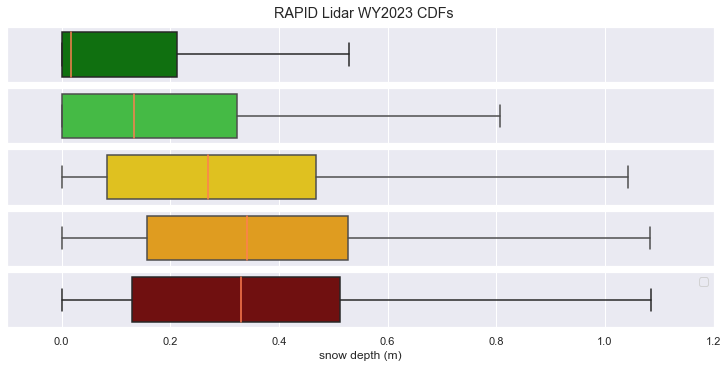

In [69]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(5, 1, sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots
sns.boxplot(ds['hs_dce_rapid_reclass_100'].values.flatten(), ax=axes[0], color='green', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_200'].values.flatten(), ax=axes[1], color='limegreen', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_300'].values.flatten(), ax=axes[2], color='gold', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_400'].values.flatten(), ax=axes[3], color='orange', fliersize=0, medianprops={"color":"coral"})
sns.boxplot(ds['hs_dce_rapid_reclass_500'].values.flatten(), ax=axes[4], color='maroon', fliersize=0, medianprops={"color":"coral"})

# labels
plt.suptitle('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
# plt.ylabel('density')
plt.xlim(0,1)
plt.xlim(-0.1,1.2)

plt.legend()
plt.show()

# Plots from inside the timeseries 10x10 plots, `baf_plots`

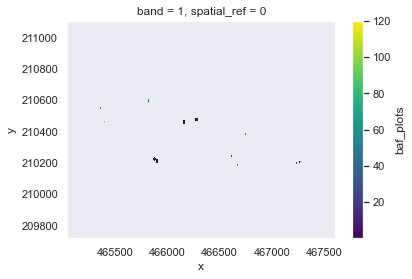

In [23]:
ds['baf_plots'].plot()
# ds['baf_ridge'].plot()

In [94]:
ds['hs_rapid_baf_plot_CNF'] = ds['hs_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CSF'] = ds['hs_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CNG'] = ds['hs_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CSG'] = ds['hs_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN20'] = ds['hs_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS20'] = ds['hs_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN50'] = ds['hs_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS50'] = ds['hs_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN60'] = ds['hs_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS60'] = ds['hs_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==   1))

ds['hs_rapid_baf_plot_CN70'] = ds['hs_rapid'].where((ds['baf_plots'] ==  70)   & (ds['baf_ridge'] ==  -1))
ds['hs_rapid_baf_plot_CS120'] = ds['hs_rapid'].where((ds['baf_plots'] ==  120) & (ds['baf_ridge'] ==   1))

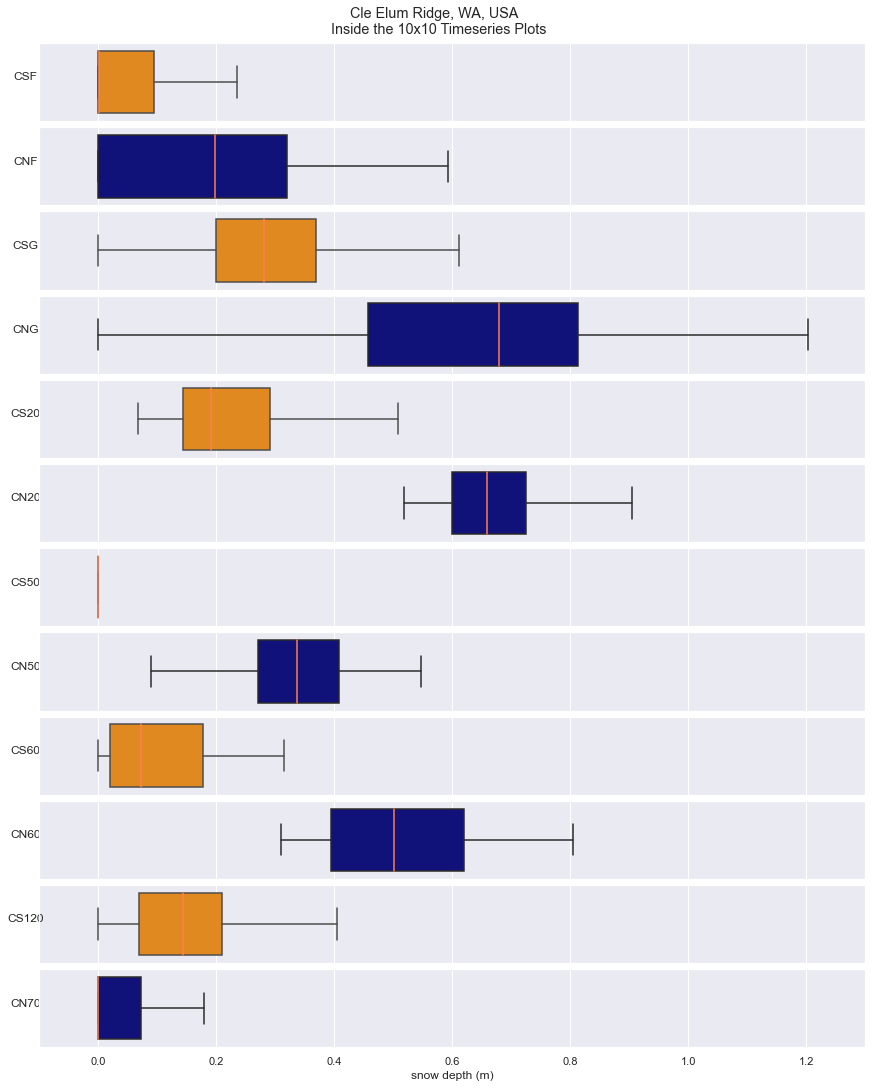

In [106]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(12, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['hs_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['hs_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], x = ds['hs_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], x = ds['hs_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], x = ds['hs_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], x = ds['hs_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], x = ds['hs_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], x = ds['hs_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], x = ds['hs_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], x = ds['hs_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], x = ds['hs_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], x = ds['hs_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[0].set_ylabel('CSF', rotation=360)
axes[1].set_ylabel('CNF', rotation=360)

axes[2].set_ylabel('CSG', rotation=360)
axes[3].set_ylabel('CNG', rotation=360)

axes[4].set_ylabel('CS20', rotation=360)
axes[5].set_ylabel('CN20', rotation=360)

axes[6].set_ylabel('CS50', rotation=360)
axes[7].set_ylabel('CN50', rotation=360)

axes[8].set_ylabel('CS60', rotation=360)
axes[9].set_ylabel('CN60', rotation=360)

axes[10].set_ylabel('CS120', rotation=360)
axes[11].set_ylabel('CN70', rotation=360)

axes[11].set_xlabel('snow depth (m)')

# adjust x limits
axes[0].set_xlim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots')

plt.show()

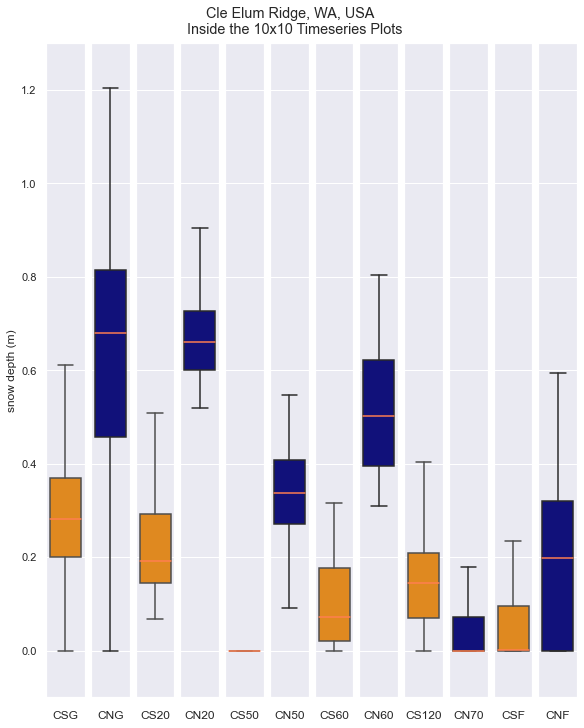

In [115]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 12, sharex=True, sharey=True, figsize=(8,10), constrained_layout = True)
alpha=0.7

# south side 

sns.boxplot(ax=axes[0], y = ds['hs_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], y = ds['hs_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], y = ds['hs_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], y = ds['hs_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], y = ds['hs_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], y = ds['hs_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], y = ds['hs_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], y = ds['hs_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], y = ds['hs_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], y = ds['hs_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], y = ds['hs_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], y = ds['hs_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[10].set_xlabel('CSF', rotation=360)
axes[11].set_xlabel('CNF', rotation=360)

axes[0].set_xlabel('CSG', rotation=360)
axes[1].set_xlabel('CNG', rotation=360)

axes[2].set_xlabel('CS20', rotation=360)
axes[3].set_xlabel('CN20', rotation=360)

axes[4].set_xlabel('CS50', rotation=360)
axes[5].set_xlabel('CN50', rotation=360)

axes[6].set_xlabel('CS60', rotation=360)
axes[7].set_xlabel('CN60', rotation=360)

axes[8].set_xlabel('CS120', rotation=360)
axes[9].set_xlabel('CN70', rotation=360)

axes[0].set_ylabel('snow depth (m)')

# adjust x limits
axes[0].set_ylim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots')

plt.show()

Now, do the same thing for distance to canopy edge inside each baf_plot

In [10]:
ds['dce_rapid_baf_plot_CNF'] = ds['dce_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CSF'] = ds['dce_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==   1))

ds['dce_rapid_baf_plot_CNG'] = ds['dce_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CSG'] = ds['dce_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==   1))

ds['dce_rapid_baf_plot_CN20'] = ds['dce_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CS20'] = ds['dce_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==   1))

ds['dce_rapid_baf_plot_CN50'] = ds['dce_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CS50'] = ds['dce_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==   1))

ds['dce_rapid_baf_plot_CN60'] = ds['dce_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CS60'] = ds['dce_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==   1))

ds['dce_rapid_baf_plot_CN70'] = ds['dce_rapid'].where((ds['baf_plots'] ==  70)   & (ds['baf_ridge'] ==  -1))
ds['dce_rapid_baf_plot_CS120'] = ds['dce_rapid'].where((ds['baf_plots'] ==  120) & (ds['baf_ridge'] ==   1))

In [13]:
ds['giulia_dce_rapid_baf_plot_CNF'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CSF'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==   1) & (ds['baf_ridge'] ==   1))

ds['giulia_dce_rapid_baf_plot_CNG'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CSG'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==   2) & (ds['baf_ridge'] ==   1))

ds['giulia_dce_rapid_baf_plot_CN20'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CS20'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  20) & (ds['baf_ridge'] ==   1))

ds['giulia_dce_rapid_baf_plot_CN50'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CS50'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  50) & (ds['baf_ridge'] ==   1))

ds['giulia_dce_rapid_baf_plot_CN60'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CS60'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  60) & (ds['baf_ridge'] ==   1))

ds['giulia_dce_rapid_baf_plot_CN70'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  70)   & (ds['baf_ridge'] ==  -1))
ds['giulia_dce_rapid_baf_plot_CS120'] = ds['giulia_dce_rapid'].where((ds['baf_plots'] ==  120) & (ds['baf_ridge'] ==   1))

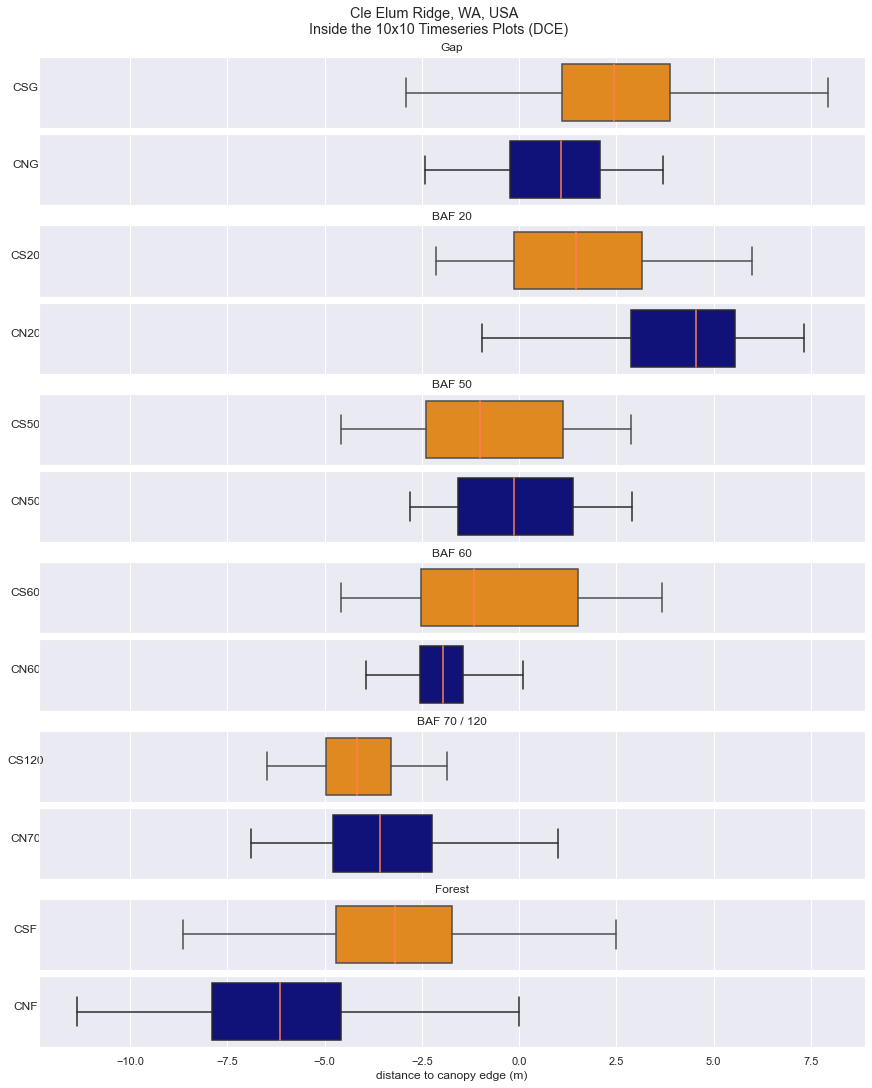

In [19]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(12, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['dce_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['dce_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], x = ds['dce_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], x = ds['dce_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], x = ds['dce_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], x = ds['dce_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], x = ds['dce_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], x = ds['dce_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], x = ds['dce_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], x = ds['dce_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], x = ds['dce_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], x = ds['dce_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[0].set_ylabel('CSG', rotation=360)
axes[1].set_ylabel('CNG', rotation=360)

axes[2].set_ylabel('CS20', rotation=360)
axes[3].set_ylabel('CN20', rotation=360)

axes[4].set_ylabel('CS50', rotation=360)
axes[5].set_ylabel('CN50', rotation=360)

axes[6].set_ylabel('CS60', rotation=360)
axes[7].set_ylabel('CN60', rotation=360)

axes[8].set_ylabel('CS120', rotation=360)
axes[9].set_ylabel('CN70', rotation=360)

axes[10].set_ylabel('CSF', rotation=360)
axes[11].set_ylabel('CNF', rotation=360)

# titles at the top of each group 
axes[0].set_title('Gap')
axes[2].set_title('BAF 20')
axes[4].set_title('BAF 50')
axes[6].set_title('BAF 60')
axes[8].set_title('BAF 70 / 120')
axes[10].set_title('Forest')

axes[11].set_xlabel('distance to canopy edge (m)')

# adjust x limits
# axes[0].set_xlim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots (DCE)')

plt.show()

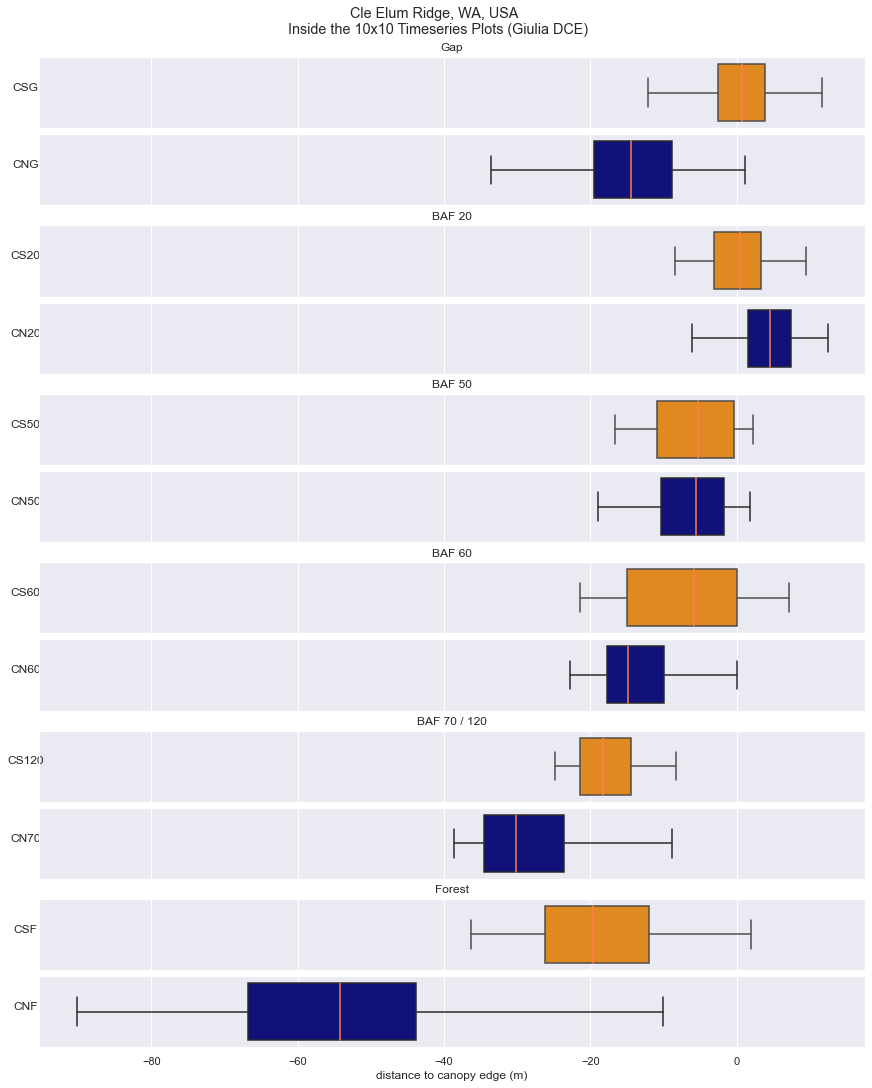

In [20]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(12, 1, sharex=True, sharey=False, figsize=(12,15), constrained_layout = True)
alpha=0.7

# south side 
sns.boxplot(ax=axes[0], x = ds['giulia_dce_rapid_baf_plot_CSG'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[1], x = ds['giulia_dce_rapid_baf_plot_CNG'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[2], x = ds['giulia_dce_rapid_baf_plot_CS20'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[3], x = ds['giulia_dce_rapid_baf_plot_CN20'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[4], x = ds['giulia_dce_rapid_baf_plot_CS50'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[5], x = ds['giulia_dce_rapid_baf_plot_CN50'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[6], x = ds['giulia_dce_rapid_baf_plot_CS60'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[7], x = ds['giulia_dce_rapid_baf_plot_CN60'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[8], x = ds['giulia_dce_rapid_baf_plot_CS120'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[9], x = ds['giulia_dce_rapid_baf_plot_CN70'].values.flatten(),  color=colornorth, medianprops={"color":"coral"}, showfliers=False)

sns.boxplot(ax=axes[10], x = ds['giulia_dce_rapid_baf_plot_CSF'].values.flatten(), color=colorsouth, medianprops={"color":"coral"}, showfliers=False)
sns.boxplot(ax=axes[11], x = ds['giulia_dce_rapid_baf_plot_CNF'].values.flatten(), color=colornorth, medianprops={"color":"coral"}, showfliers=False)


# labels
axes[0].set_ylabel('CSG', rotation=360)
axes[1].set_ylabel('CNG', rotation=360)

axes[2].set_ylabel('CS20', rotation=360)
axes[3].set_ylabel('CN20', rotation=360)

axes[4].set_ylabel('CS50', rotation=360)
axes[5].set_ylabel('CN50', rotation=360)

axes[6].set_ylabel('CS60', rotation=360)
axes[7].set_ylabel('CN60', rotation=360)

axes[8].set_ylabel('CS120', rotation=360)
axes[9].set_ylabel('CN70', rotation=360)

axes[10].set_ylabel('CSF', rotation=360)
axes[11].set_ylabel('CNF', rotation=360)

# titles at the top of each group 
axes[0].set_title('Gap')
axes[2].set_title('BAF 20')
axes[4].set_title('BAF 50')
axes[6].set_title('BAF 60')
axes[8].set_title('BAF 70 / 120')
axes[10].set_title('Forest')

axes[11].set_xlabel('distance to canopy edge (m)')

# adjust x limits
# axes[0].set_xlim(-0.1,1.3)

plt.suptitle('Cle Elum Ridge, WA, USA \n Inside the 10x10 Timeseries Plots (Giulia DCE)')

plt.show()

# Calculate the % Canopy Cover Metric

Let's go one baf at a time.

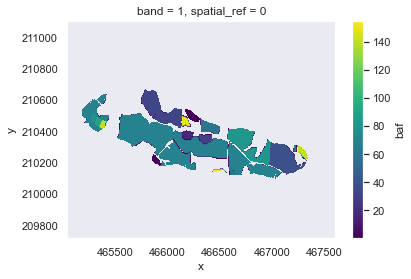

In [163]:
ds['baf'].plot()

In [177]:
# Define the canopy cover threshold
canopy_threshold = 2

# Determine the canopy grid cells
canopy_mask = ds['chmws_rapid'] > canopy_threshold

# Calculate the total number of canopy grid cells in the forest treatment area
baf_new_value = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == baf_new_value)
total_canopy_cells = np.sum(canopy_mask * treatment_area)

# Calculate the total number of grid cells in the forest treatment area
total_treatment_cells = np.sum(treatment_area)

# Calculate the percentage of canopy cover
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

print(f'Percentage of canopy cover in the forest treatment area: {percentage_canopy_cover.values}%')

Percentage of canopy cover in the forest treatment area: 64.73274827003479%


I created the code below, which is used in the large loop to do this for all the BAF. Compare the values to make sure everything is correct. 

In [178]:
BAF = 1
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 2
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 17
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')

BAF = 32
treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
total_canopy_cells = np.sum(canopy_mask * treatment_area)
total_treatment_cells = np.sum(treatment_area)
percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100
print(f'Percentage of canopy cover in the forest treatment area for BAF {BAF}: {percentage_canopy_cover.values}%')


Percentage of canopy cover in the forest treatment area for BAF 1: 64.73274827003479%
Percentage of canopy cover in the forest treatment area for BAF 2: 95.09132504463196%
Percentage of canopy cover in the forest treatment area for BAF 17: 29.30718958377838%
Percentage of canopy cover in the forest treatment area for BAF 32: 59.14224982261658%


In [156]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [157]:
df.dtypes

BAF                 int64
canopy_cover_2m    object
canopy_cover_3m    object
canopy_cover_4m    object
dtype: object

In [158]:
# change the type to integer for all columns 
df = df.astype(int)

In [159]:
df.canopy_cover_2m.dtype

dtype('int32')

In [160]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [161]:
df

BAF  canopy_cover_2m  canopy_cover_3m  canopy_cover_4m
0     1               64               55               47
1     2               95               93               91
2    17               29               23               18
3    30               34               30               27
4    32               59               53               49
5    38               45               42               39
6    60               51               48               45
7    69               56               53               50
8    80               53               47               44
9    82               65               62               58
10   90               58               56               54
11  140               67               64               60
12  150               99               99               98
13  155               91               89               87

Text(0.5, 1.0, 'threshold for 2m')

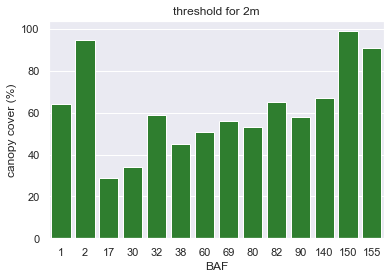

In [162]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [163]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

In [164]:
df2.head()

BAF        threshold  canopy_cover
0    1  canopy_cover_2m            64
1    2  canopy_cover_2m            95
2   17  canopy_cover_2m            29
3   30  canopy_cover_2m            34
4   32  canopy_cover_2m            59

Text(0.5, 1.0, 'percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

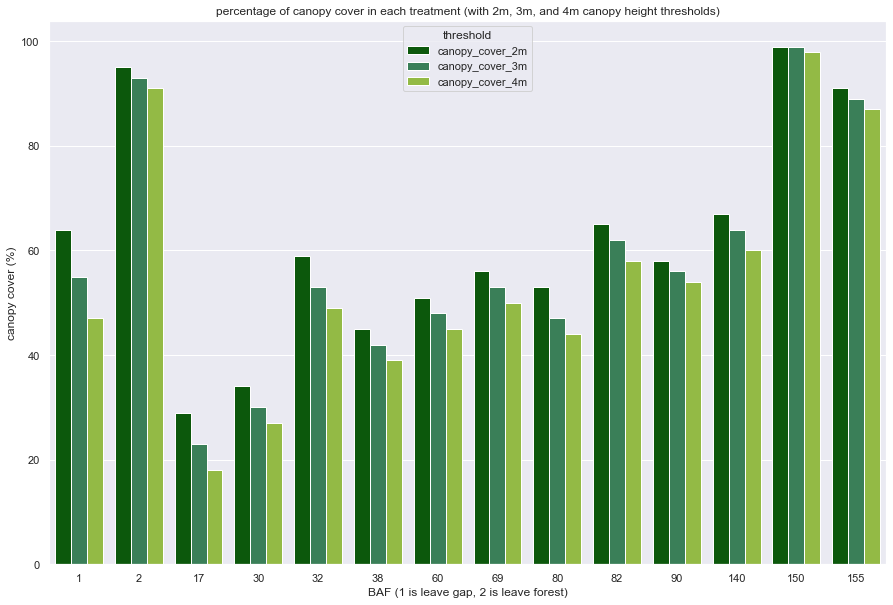

In [165]:
# increase figure size
fig = plt.figure(figsize=(15, 10))
color='forestgreen'
palette=['darkgreen', 'seagreen', 'yellowgreen']

# sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', color='green')

sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('canopy cover (%)')
plt.title('percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

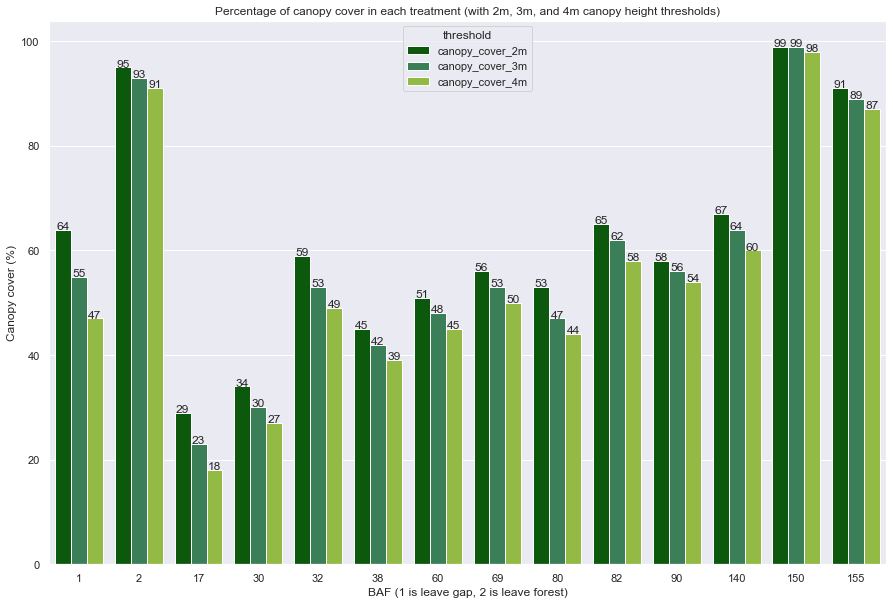

In [166]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

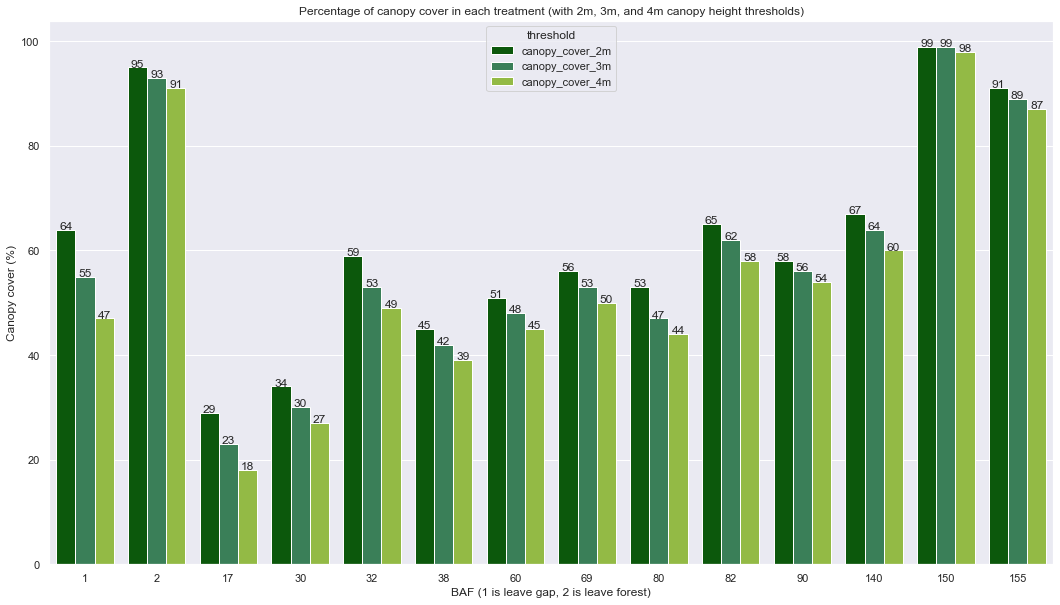

In [167]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

## Now, we want to get % canopy cover for before the treatments too

In [168]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [169]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

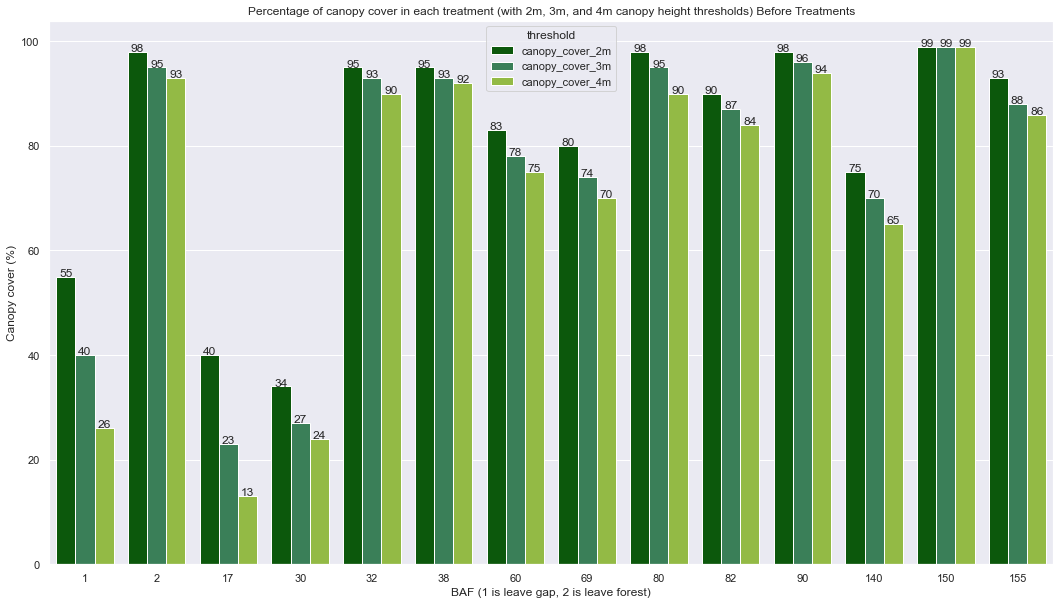

In [170]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

Now, merge the df2 and df2_pre with only the 2m threshold to then compare on one plot

In [179]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [180]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'pre'
df2_pos['treatment'] = 'post'

df2_all = pd.concat([df2_pre, df2_pos])
df2_all.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_18248\4030389355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'post'


BAF        threshold  canopy_cover treatment
0    1  canopy_cover_2m            55       pre
1    2  canopy_cover_2m            98       pre
2   17  canopy_cover_2m            40       pre
3   30  canopy_cover_2m            34       pre
4   32  canopy_cover_2m            95       pre

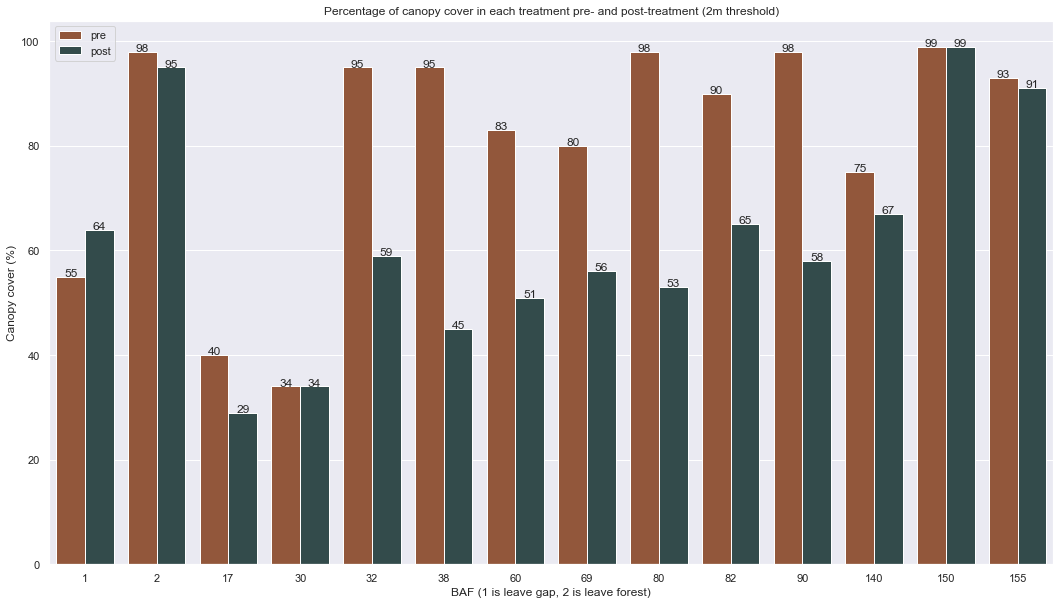

In [182]:
fig = plt.figure(figsize=(18, 10))
palette = [colorpre, colorpos]

# Create a barplot with values
barplot = sns.barplot(data=df2_all, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment pre- and post-treatment (2m threshold)')
plt.legend(loc='upper left')

plt.show()

## Create a scatter plot of % canopy cover and median snow depth for each treatment. 

In [110]:
df2.head()

BAF        threshold  canopy_cover
0    1  canopy_cover_2m            64
1    2  canopy_cover_2m            95
2   17  canopy_cover_2m            29
3   30  canopy_cover_2m            34
4   32  canopy_cover_2m            59

In [112]:
# We already have the following variables for hs inside each treatment 
# ds['hs_rapid_baf_new_1']
# ds['hs_rapid_baf_new_1_n']
# ds['hs_rapid_baf_new_1_s']

# Now, we want to take the median of each of those, and put them into the dataframe 
df3 = df2.copy(deep=True)

# initialize the new columns
df3['hs_median'] = np.nan
df3['hs_median_n'] = np.nan
df3['hs_median_s'] = np.nan

# loop through the rows and calculate the median for each of the hs variables
for index, row in df3.iterrows():
    BAF = row['BAF']
    threshold = row['threshold']
    
    # calculate the median for the hs variable
    hs_median = ds[f'hs_rapid_baf_new_{BAF}'].median().values
    hs_median_n = ds[f'hs_rapid_baf_new_{BAF}_n'].median().values
    hs_median_s = ds[f'hs_rapid_baf_new_{BAF}_s'].median().values
    
    # update the dataframe with the median values
    df3.at[index, 'hs_median'] = hs_median
    df3.at[index, 'hs_median_n'] = hs_median_n
    df3.at[index, 'hs_median_s'] = hs_median_s
    
# Print the DataFrame
print(df3)


    BAF        threshold  canopy_cover  hs_median  hs_median_n  hs_median_s
0     1  canopy_cover_2m            64   0.606720     0.673523     0.380096
1     2  canopy_cover_2m            95   0.000000          NaN     0.000000
2    17  canopy_cover_2m            29   0.329163     0.327637     0.329315
3    30  canopy_cover_2m            34   0.206604          NaN     0.206604
4    32  canopy_cover_2m            59   0.446960     0.446960          NaN
5    38  canopy_cover_2m            45   0.597321     0.597321          NaN
6    60  canopy_cover_2m            51   0.360535     0.361938     0.353210
7    69  canopy_cover_2m            56   0.178101     0.039551     0.178101
8    80  canopy_cover_2m            53   0.124268          NaN     0.124268
9    82  canopy_cover_2m            65   0.312164     0.312134     0.408020
10   90  canopy_cover_2m            58   0.148193          NaN     0.148193
11  140  canopy_cover_2m            67   0.397400     0.478943     0.226501
12  150  can

In [114]:
# let's make a dataframe, df3_2m, which only includes the 2m threshold values
df3_2m = df3[df3['threshold'] == 'canopy_cover_2m']

In [115]:
df3_2m

BAF        threshold  canopy_cover  hs_median  hs_median_n  hs_median_s
0     1  canopy_cover_2m            64   0.606720     0.673523     0.380096
1     2  canopy_cover_2m            95   0.000000          NaN     0.000000
2    17  canopy_cover_2m            29   0.329163     0.327637     0.329315
3    30  canopy_cover_2m            34   0.206604          NaN     0.206604
4    32  canopy_cover_2m            59   0.446960     0.446960          NaN
5    38  canopy_cover_2m            45   0.597321     0.597321          NaN
6    60  canopy_cover_2m            51   0.360535     0.361938     0.353210
7    69  canopy_cover_2m            56   0.178101     0.039551     0.178101
8    80  canopy_cover_2m            53   0.124268          NaN     0.124268
9    82  canopy_cover_2m            65   0.312164     0.312134     0.408020
10   90  canopy_cover_2m            58   0.148193          NaN     0.148193
11  140  canopy_cover_2m            67   0.397400     0.478943     0.226501
12  150  canopy_cover_2m            99   0.142151     0.142151          NaN
13  155  canopy_cover_2m            91   0.151367          NaN     0.151367

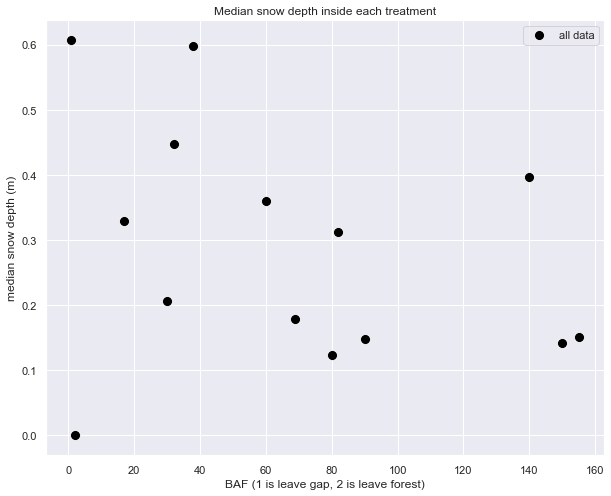

In [137]:
# Now, let's make a scatter plot of baf in xaxis and hs_median in yaxis
fig = plt.figure(figsize=(10, 8))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a scatter plot
scatterplot = sns.scatterplot(data=df3_2m, x='BAF', y='hs_median', color='black', s=100, label='all data')

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('median snow depth (m)')
plt.title('Median snow depth inside each treatment')

plt.show()

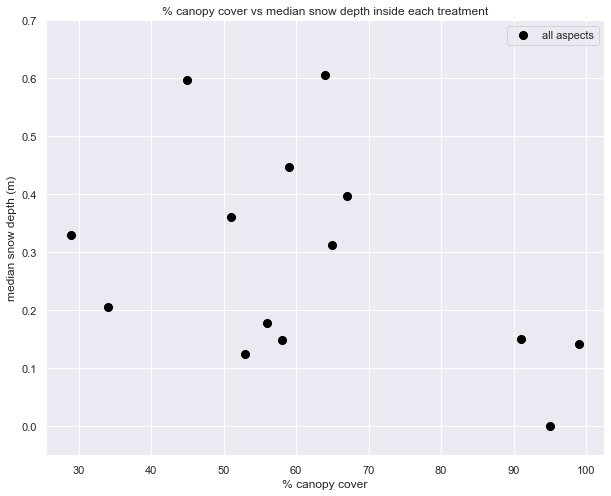

In [135]:
# Now, let's make a scatter plot of baf in xaxis and hs_median in yaxis
fig = plt.figure(figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(data=df3_2m, x='canopy_cover', y='hs_median', color='black', s=100, label='all aspects')

# Customize the layout
plt.xlabel('% canopy cover')
plt.ylabel('median snow depth (m)')
plt.title('% canopy cover vs median snow depth inside each treatment')
plt.ylim(-0.05,0.7)

plt.show()

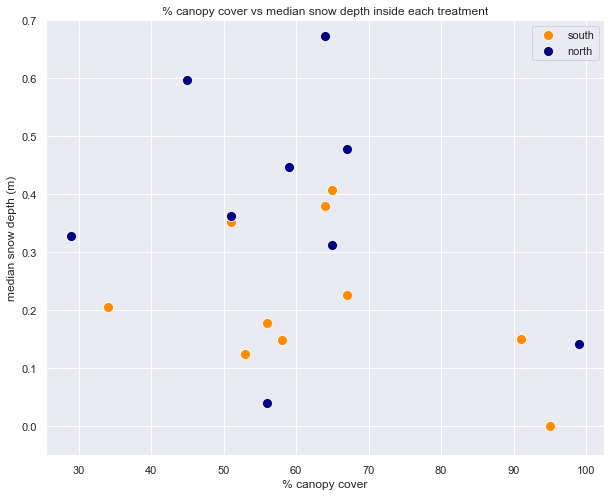

In [133]:
# Now, let's make a scatter plot of baf in xaxis and hs_median in yaxis
fig = plt.figure(figsize=(10, 8))

# Create a scatter plot
sns.scatterplot(data=df3_2m, x='canopy_cover', y='hs_median_s', color='darkorange', s=100, label='south')
sns.scatterplot(data=df3_2m, x='canopy_cover', y='hs_median_n', color='navy', s=100, label='north')


# Customize the layout
plt.xlabel('% canopy cover')
plt.ylabel('median snow depth (m)')
plt.title('% canopy cover vs median snow depth inside each treatment')
plt.ylim(-0.05,0.7)

plt.show()

## % Canopy Cover within the timeseries plots, `baf_plots`

Now, I want to make this same plot for the % canopy cover at the timeseries sites `baf_plots` instead of in the treatment defined areas. 

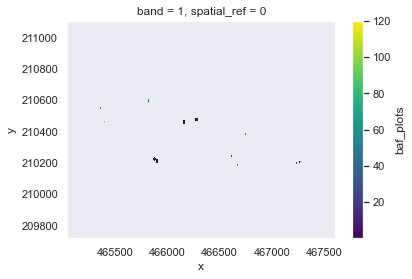

In [24]:
ds.baf_plots.plot()

In [25]:
# 1 is gap, 2 is forest, the rest are 50,60,70 and 120. The side of the ridge is determined by the baf_ridge variable.

ds['baf_plots_south'] = ds['baf_plots'].where(ds['baf_ridge'] ==   1)
ds['baf_plots_north'] = ds['baf_plots'].where(ds['baf_ridge'] ==  -1)

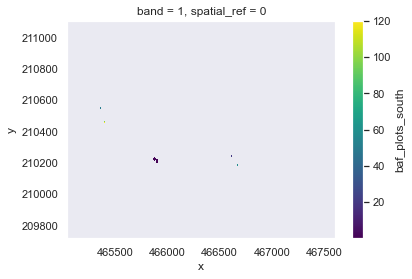

In [26]:
ds.baf_plots_south.plot()

In [44]:
# Initialize the DataFrame
df_south = pd.DataFrame(columns=['BAF_south', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_south['BAF_south'] = [1, 2, 20, 50, 60, 120]

# Loop through the BAF_south values and calculate the percentage of canopy cover
for index, row in df_south.iterrows():
    BAF_south = row['BAF_south']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_south'].where(ds['baf_plots_south'] == BAF_south)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_south.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_south'].where(ds['baf_plots_south'] == BAF_south)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_south.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_south'].where(ds['baf_plots_south'] == BAF_south)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_south.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_south)

   BAF_south canopy_cover_2m canopy_cover_3m canopy_cover_4m
0          1              94              91              90
1          2              20              17              16
2         20              34              34              34
3         50              69              69              66
4         60              63              62              59
5        120             100             100             100


In [45]:
# Initialize the DataFrame
df_north = pd.DataFrame(columns=['BAF_north', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_north['BAF_north'] = [1, 2, 20, 50, 60, 70]

# Loop through the BAF_north values and calculate the percentage of canopy cover
for index, row in df_north.iterrows():
    BAF_north = row['BAF_north']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_north'].where(ds['baf_plots_north'] == BAF_north)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_north'].where(ds['baf_plots_north'] == BAF_north)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_plots_north'].where(ds['baf_plots_north'] == BAF_north)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_north)

   BAF_north canopy_cover_2m canopy_cover_3m canopy_cover_4m
0          1             100             100              99
1          2              40              31              23
2         20               6               2               2
3         50              61              54              53
4         60              96              96              95
5         70              96              96              95


Text(0.5, 1.0, 'threshold for 2m')

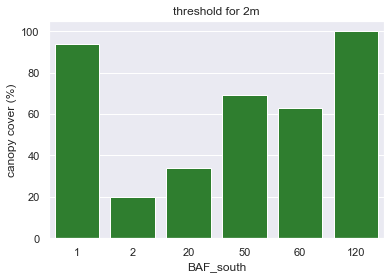

In [50]:
# change the type to integer for all columns 
df_south = df_south.astype(int)

# Now, plot these to compare. 
sns.barplot(data=df_south, x='BAF_south', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

Text(0.5, 1.0, 'threshold for 2m')

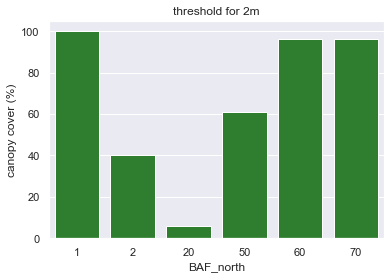

In [51]:
# change the type to integer for all columns 
df_north = df_north.astype(int)

# Now, plot these to compare. 
sns.barplot(data=df_north, x='BAF_north', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [78]:
#create a version of this dataframe, df2_south, which uses a variable hue to show the different canopy cover values
df2_south = pd.melt(df_south, id_vars=['BAF_south'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

#create a version of this dataframe, df2_north, which uses a variable hue to show the different canopy cover values
df2_north = pd.melt(df_north, id_vars=['BAF_north'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

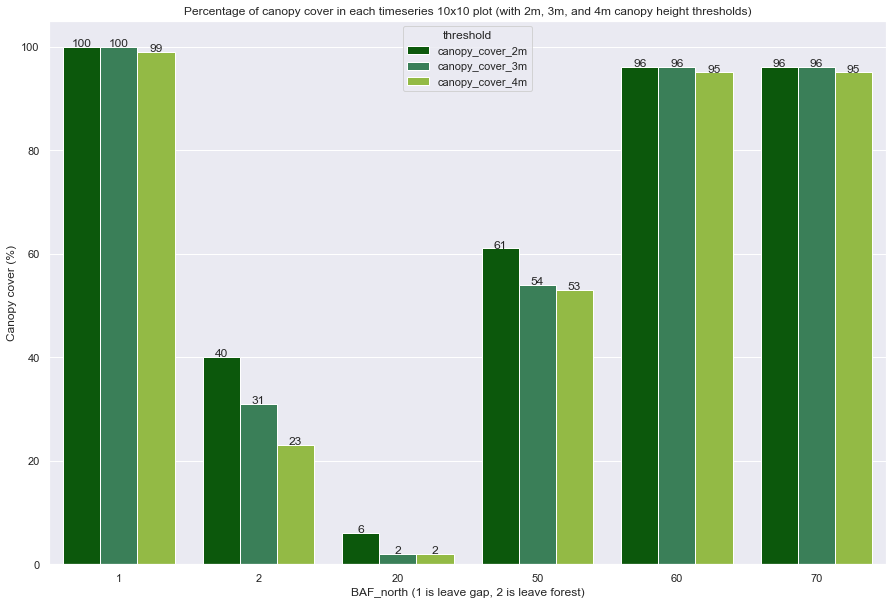

In [79]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_north, x='BAF_north', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF_north (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each timeseries 10x10 plot (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

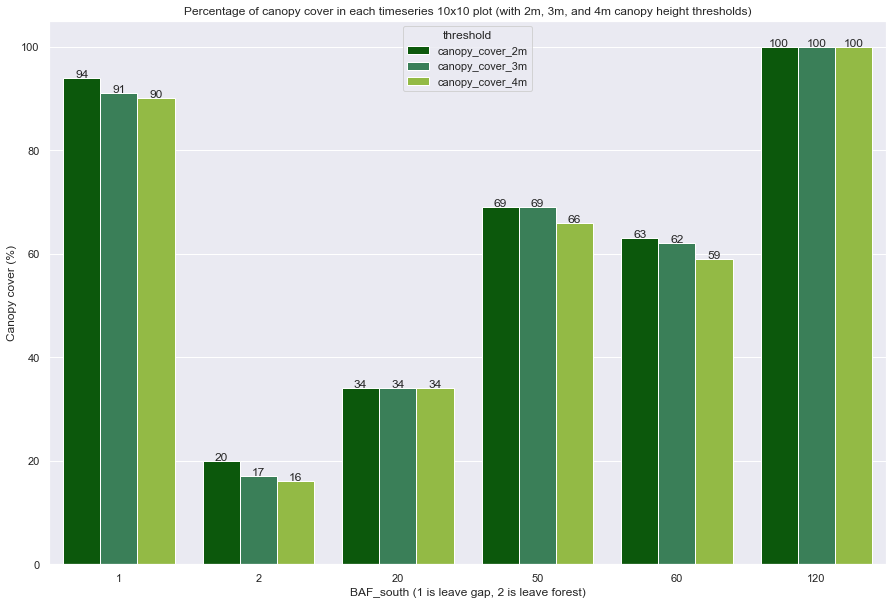

In [80]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_south, x='BAF_south', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF_south (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each timeseries 10x10 plot (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

In [81]:
df2_south1 = df2_south.copy()
df2_south1['aspect'] = 'south'
df2_south1['BAF'] = df_south['BAF_south']
df2_south1 = df2_south1.drop('BAF_south', axis=1)

df2_north2 = df2_north.copy()
df2_north2['aspect'] = 'north'
df2_north2['BAF'] = df_north['BAF_north']
df2_north2 = df2_north2.drop('BAF_north', axis=1)

df2_merged = pd.concat([df2_south1, df2_north2], axis=0, ignore_index=True)

In [82]:
df2_merged.head()

threshold  canopy_cover aspect   BAF
0  canopy_cover_2m            94  south   1.0
1  canopy_cover_2m            20  south   2.0
2  canopy_cover_2m            34  south  20.0
3  canopy_cover_2m            69  south  50.0
4  canopy_cover_2m            63  south  60.0

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


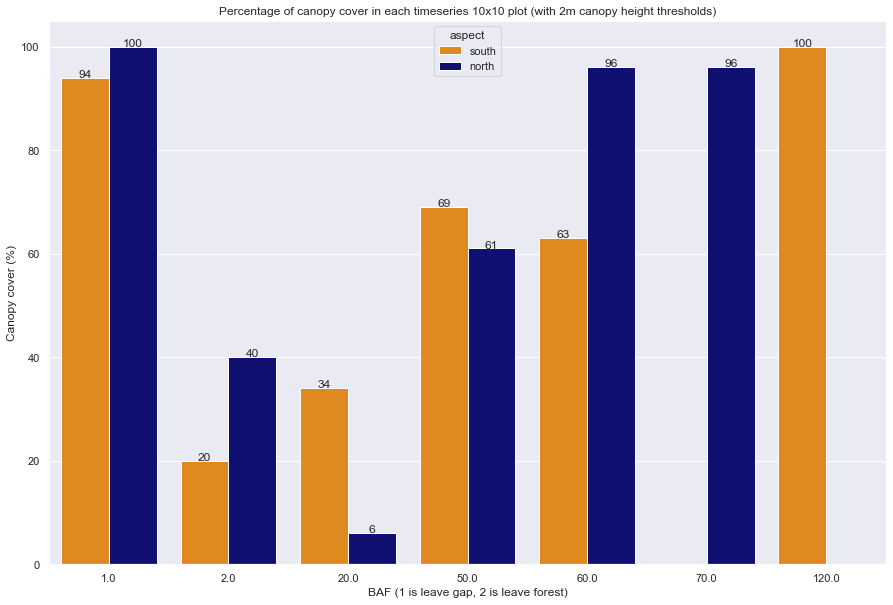

In [96]:
fig = plt.figure(figsize=(15, 10))
palette = ['darkorange', 'navy']

# Create a barplot with values
barplot = sns.barplot(data=df2_merged, x='BAF', y='canopy_cover', hue='aspect', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each timeseries 10x10 plot (with 2m canopy height thresholds)')

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

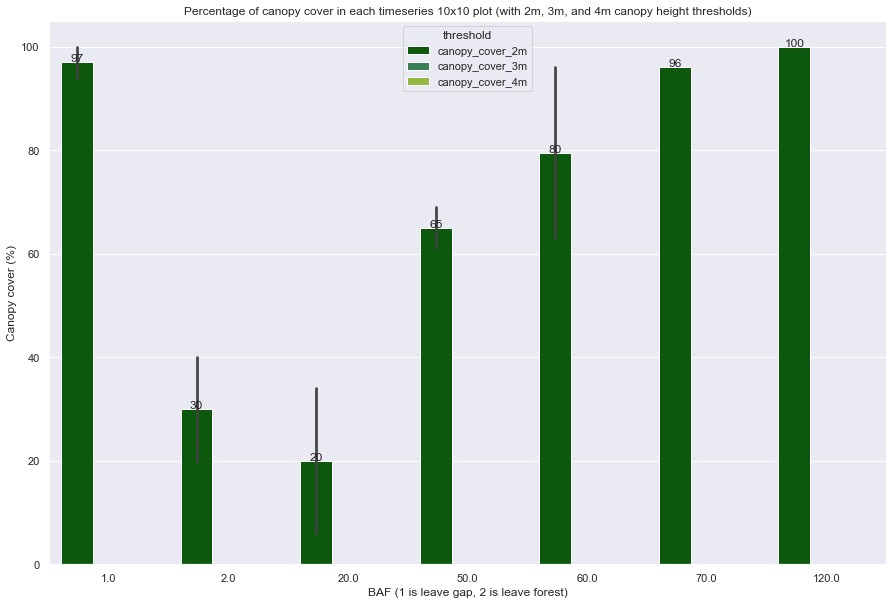

In [88]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_merged, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each timeseries 10x10 plot (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

In [89]:
df2_merged_2m = df2_merged[df2_merged['threshold'].isin(['canopycover_2m'])]
df2_merged_3m = df2_merged[df2_merged['threshold'].isin(['canopycover_3m'])]
df2_merged_4m = df2_merged[df2_merged['threshold'].isin(['canopycover_4m'])]

In [97]:
df2_merged.head()

threshold  canopy_cover aspect   BAF
0  canopy_cover_2m            94  south   1.0
1  canopy_cover_2m            20  south   2.0
2  canopy_cover_2m            34  south  20.0
3  canopy_cover_2m            69  south  50.0
4  canopy_cover_2m            63  south  60.0

In [92]:
df2_merged_2m

Empty DataFrame
Columns: [threshold, canopy_cover, aspect, BAF]
Index: []

That did not work. I can come back to that later if it is useful...